In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import root_mean_squared_error, r2_score, roc_auc_score, roc_curve, auc,confusion_matrix, accuracy_score,precision_score,recall_score, f1_score
from sklearn.decomposition import PCA
import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from keras.layers import Dense
from keras.models import Sequential
from keras.metrics import Precision, Recall, RootMeanSquaredError

In [2]:
from keras.regularizers import l2
from keras.layers import Dropout
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree

In [3]:
column_name = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell Weight","Rings"]
df = pd.read_csv("abalone.data", header=None,names = column_name)

In [4]:
df["Sex"] = df["Sex"].replace({"M":0, "F":1, "I":2})
df['is_male'] = (df["Sex"] == 0).astype(int)
df['is_infant'] = (df["Sex"] == 2).astype(int)
df = df.drop(columns = ['Sex'])
cols = ['is_male','is_infant'] + [c for c in df.columns if c not in ['is_male','is_infant']]
df = df[cols]
df

C:\Users\User\AppData\Local\Temp\ipykernel_26632\4235175722.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({"M":0, "F":1, "I":2})


is_male  is_infant  Length  Diameter  Height  Whole weight  \
0           1          0   0.455     0.365   0.095        0.5140   
1           1          0   0.350     0.265   0.090        0.2255   
2           0          0   0.530     0.420   0.135        0.6770   
3           1          0   0.440     0.365   0.125        0.5160   
4           0          1   0.330     0.255   0.080        0.2050   
...       ...        ...     ...       ...     ...           ...   
4172        0          0   0.565     0.450   0.165        0.8870   
4173        1          0   0.590     0.440   0.135        0.9660   
4174        1          0   0.600     0.475   0.205        1.1760   
4175        0          0   0.625     0.485   0.150        1.0945   
4176        1          0   0.710     0.555   0.195        1.9485   

      Shucked weight  Viscera weight  Shell Weight  Rings  
0             0.2245          0.1010        0.1500     15  
1             0.0995          0.0485        0.0700      7  
2             0.2565          0.1415        0.2100      9  
3             0.2155          0.1140        0.1550     10  
4             0.0895          0.0395        0.0550      7  
...              ...             ...           ...    ...  
4172          0.3700          0.2390        0.2490     11  
4173          0.4390          0.2145        0.2605     10  
4174          0.5255          0.2875        0.3080      9  
4175          0.5310          0.2610        0.2960     10  
4176          0.9455          0.3765        0.4950     12  

[4177 rows x 10 columns]

In [5]:
age_class = []
for i in df["Rings"]:
    if i<=7:
        age_class.append(0)
    elif i>7 and i<= 10:
        age_class.append(1)
    elif i>10 and i<=15:
        age_class.append(2)
    else:
        age_class.append(3)

In [6]:
df['Age Class'] = age_class

In [7]:
df

is_male  is_infant  Length  Diameter  Height  Whole weight  \
0           1          0   0.455     0.365   0.095        0.5140   
1           1          0   0.350     0.265   0.090        0.2255   
2           0          0   0.530     0.420   0.135        0.6770   
3           1          0   0.440     0.365   0.125        0.5160   
4           0          1   0.330     0.255   0.080        0.2050   
...       ...        ...     ...       ...     ...           ...   
4172        0          0   0.565     0.450   0.165        0.8870   
4173        1          0   0.590     0.440   0.135        0.9660   
4174        1          0   0.600     0.475   0.205        1.1760   
4175        0          0   0.625     0.485   0.150        1.0945   
4176        1          0   0.710     0.555   0.195        1.9485   

      Shucked weight  Viscera weight  Shell Weight  Rings  Age Class  
0             0.2245          0.1010        0.1500     15          2  
1             0.0995          0.0485        0.0700      7          0  
2             0.2565          0.1415        0.2100      9          1  
3             0.2155          0.1140        0.1550     10          1  
4             0.0895          0.0395        0.0550      7          0  
...              ...             ...           ...    ...        ...  
4172          0.3700          0.2390        0.2490     11          2  
4173          0.4390          0.2145        0.2605     10          1  
4174          0.5255          0.2875        0.3080      9          1  
4175          0.5310          0.2610        0.2960     10          1  
4176          0.9455          0.3765        0.4950     12          2  

[4177 rows x 11 columns]

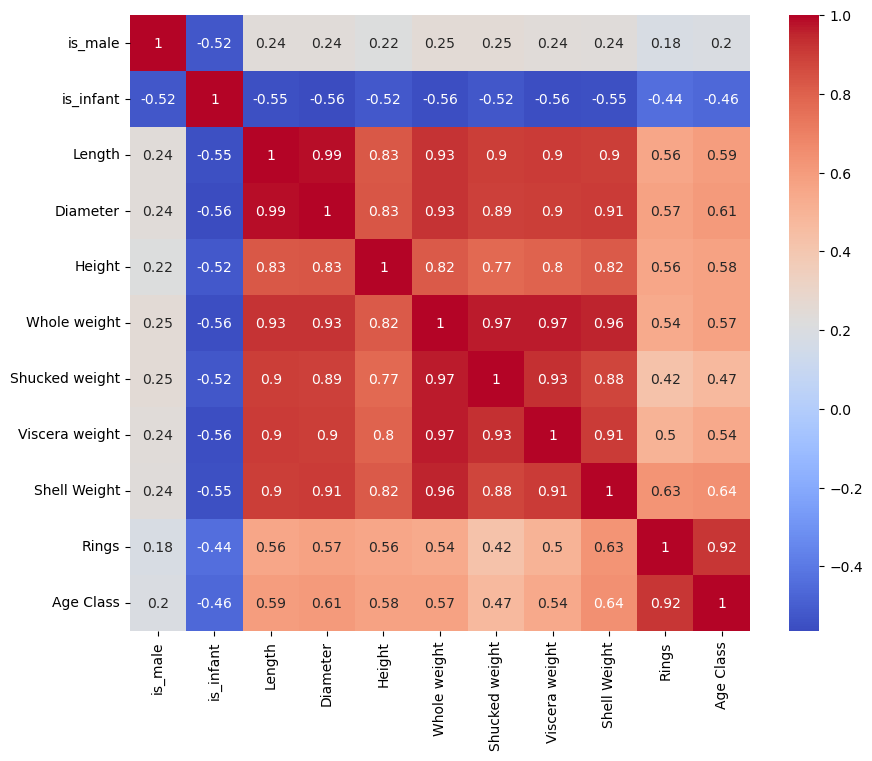

In [8]:
corr = df.corr() 
plt.figure(figsize=(10,8))
sb.heatmap(corr, annot = True, cmap='coolwarm')
plt.savefig("heatmap.png") 
plt.show()

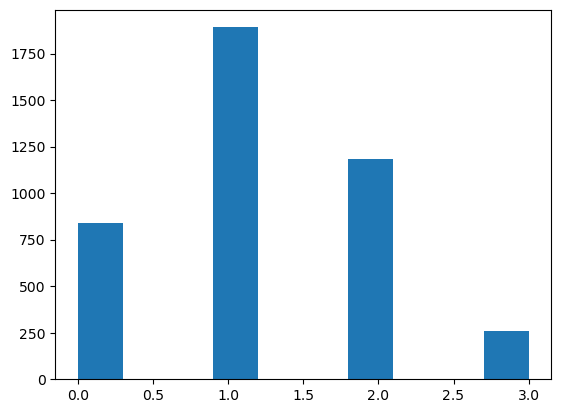

In [9]:
plt.hist(df['Age Class'])
plt.savefig("AgeClass.png") 

C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


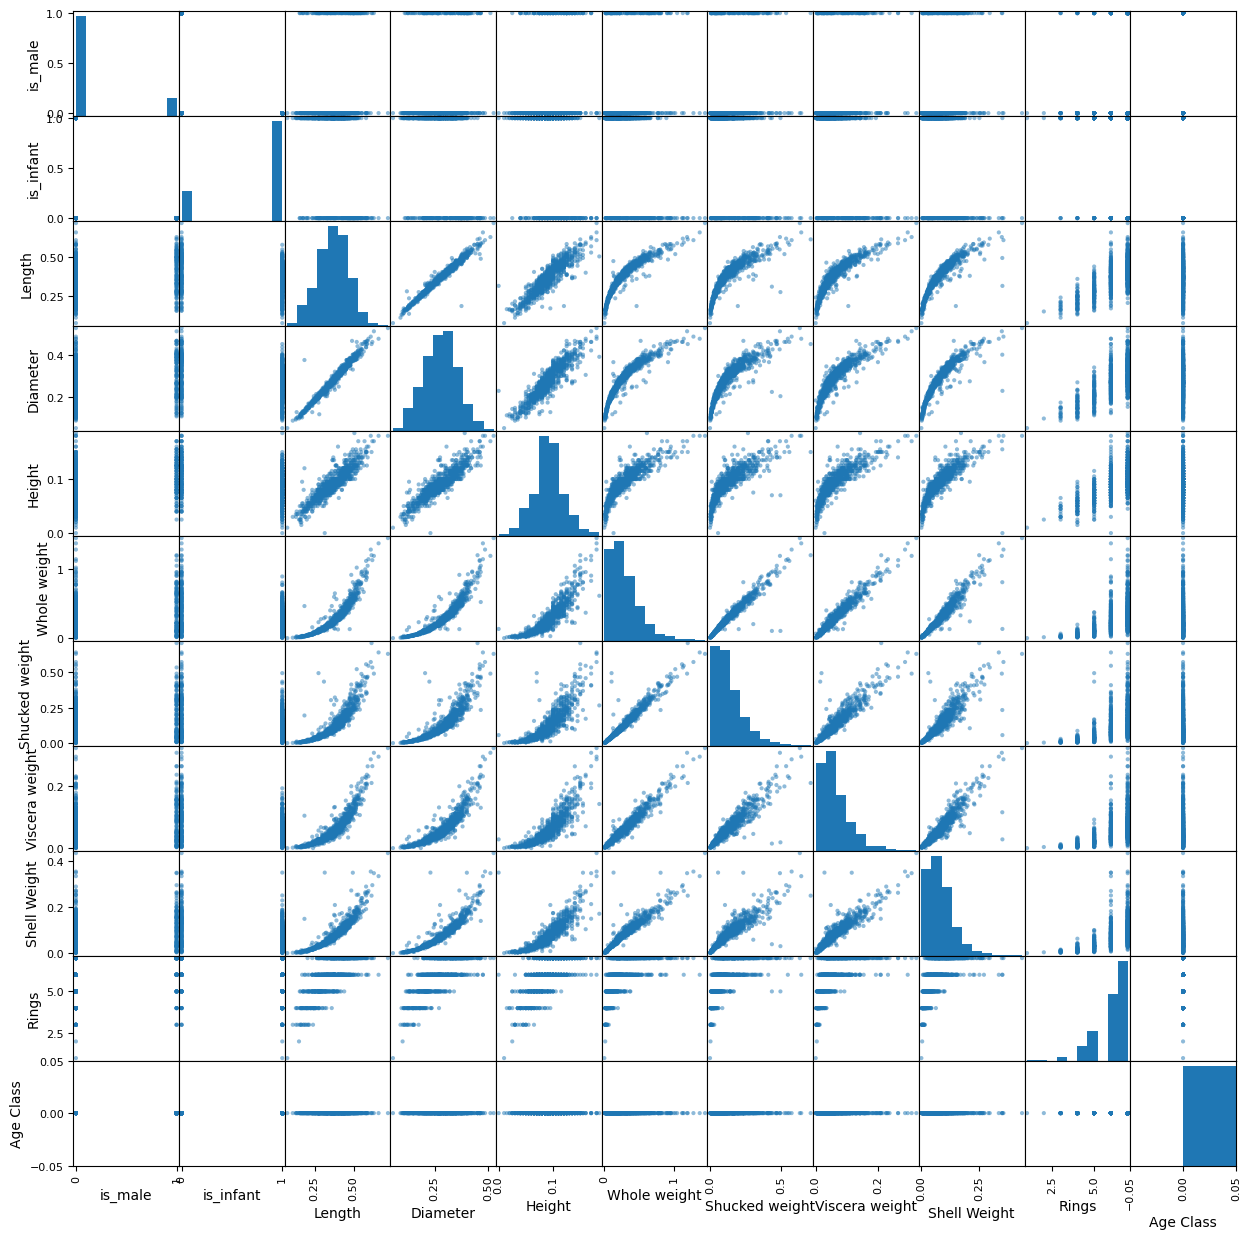

In [10]:
df_class1 = df[df['Age Class'] == 0]
pd.plotting.scatter_matrix(df_class1,figsize=(15, 15),diagonal='hist')
plt.show()

<Axes: >

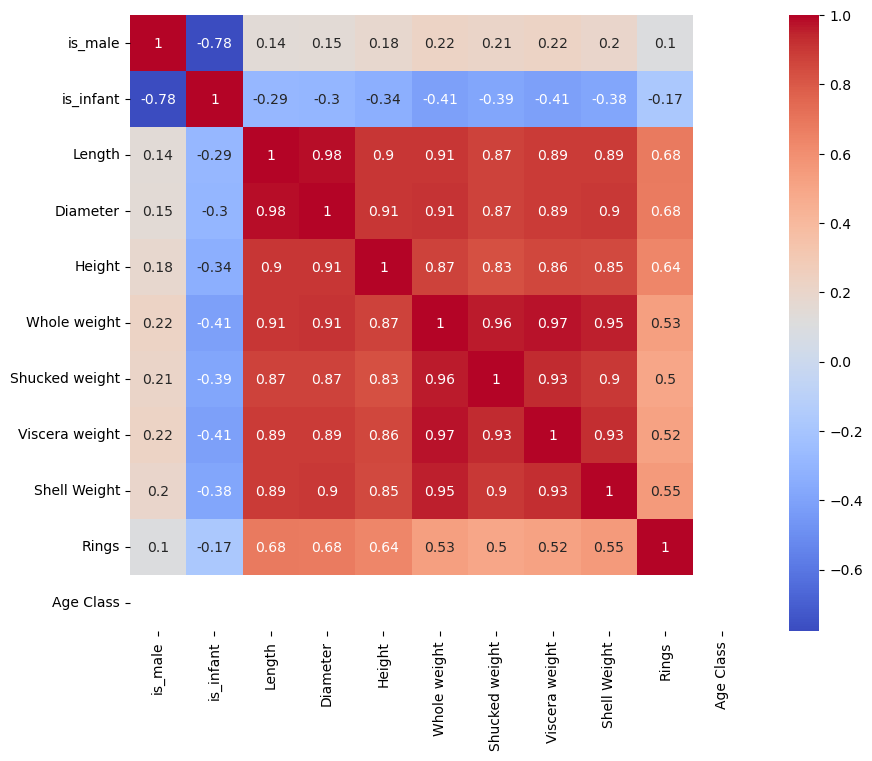

In [11]:
corr = df_class1.corr() 
plt.figure(figsize=(10,8))
sb.heatmap(corr, annot = True, cmap='coolwarm')

C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


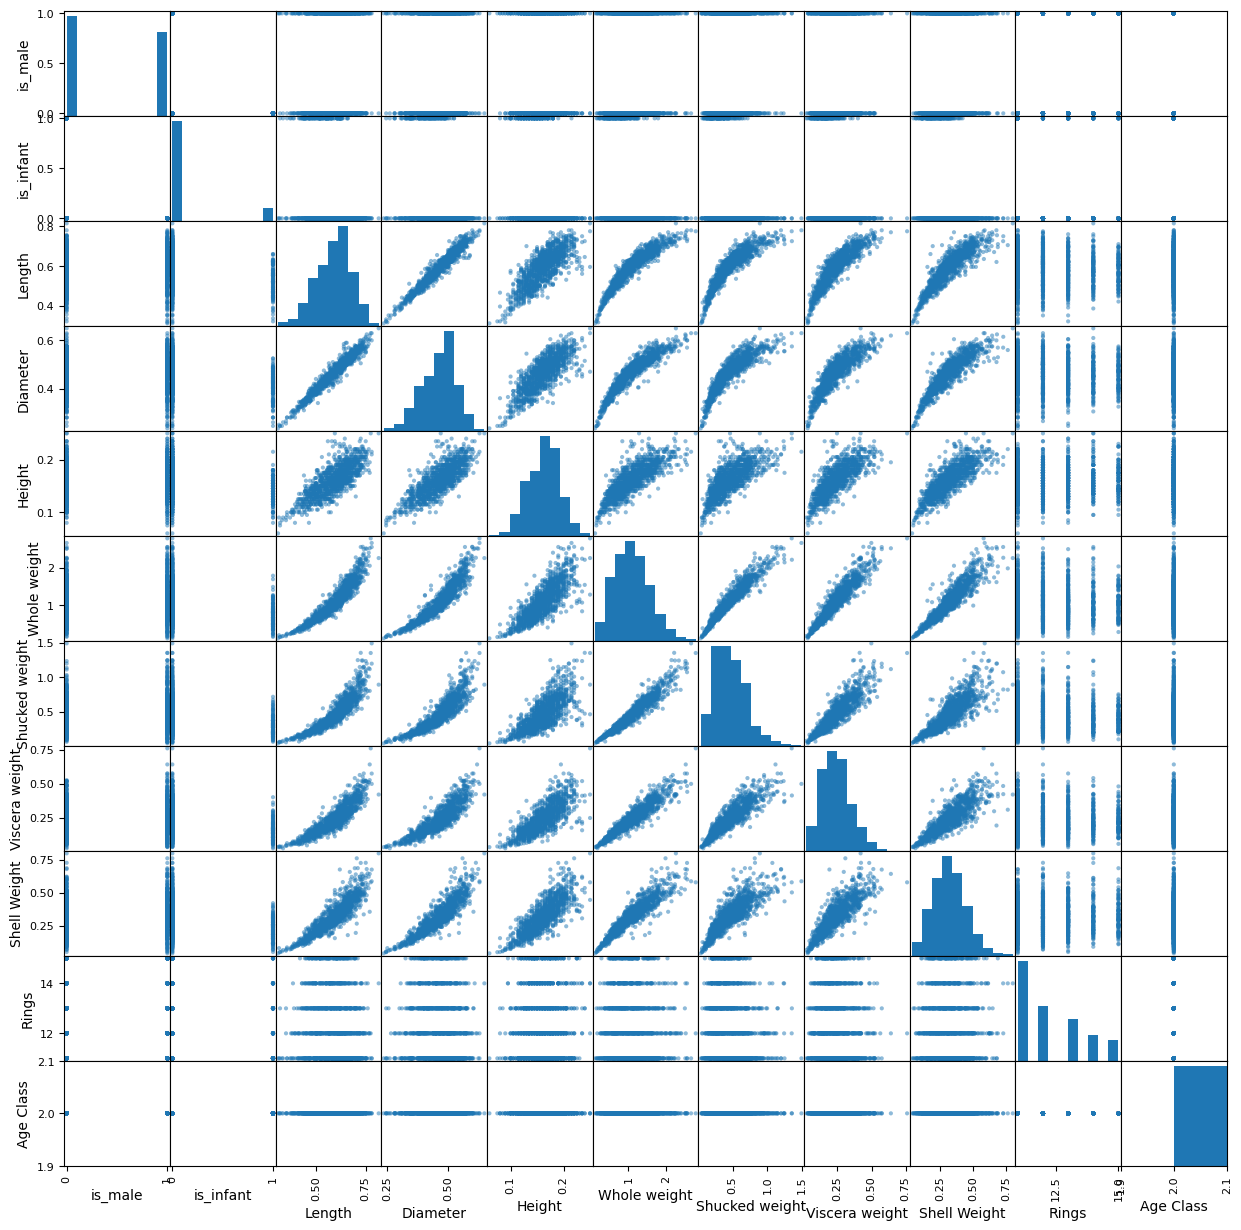

In [12]:
df_class2 = df[df['Age Class'] == 2]
pd.plotting.scatter_matrix(df_class2,figsize=(15, 15),diagonal='hist')
plt.show()

<Axes: >

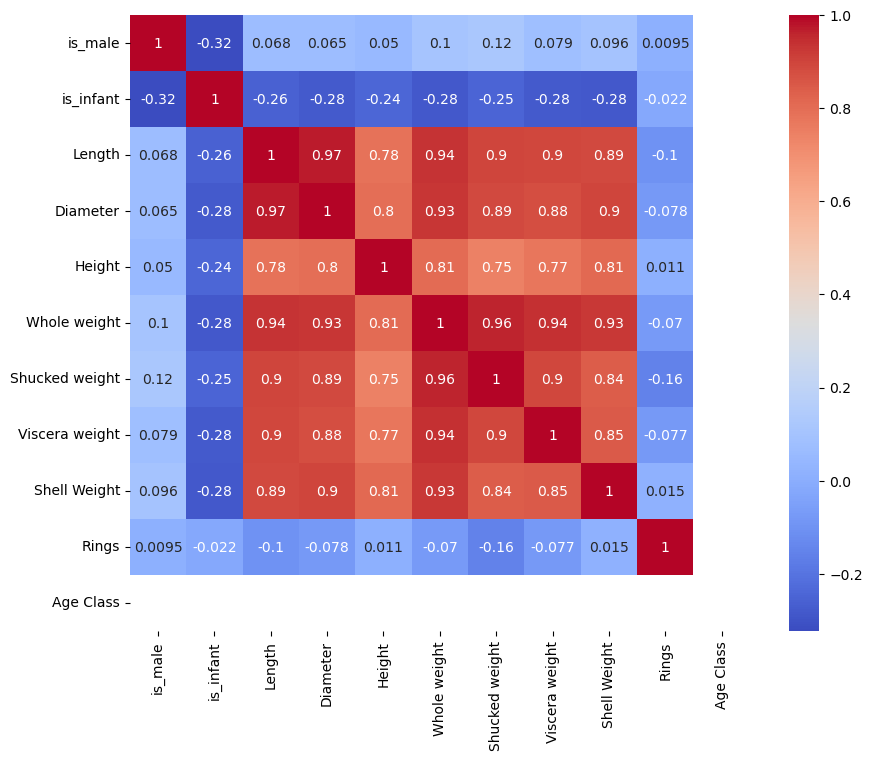

In [13]:
corr = df_class2.corr() 
plt.figure(figsize=(10,8))
sb.heatmap(corr, annot = True, cmap='coolwarm')

C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


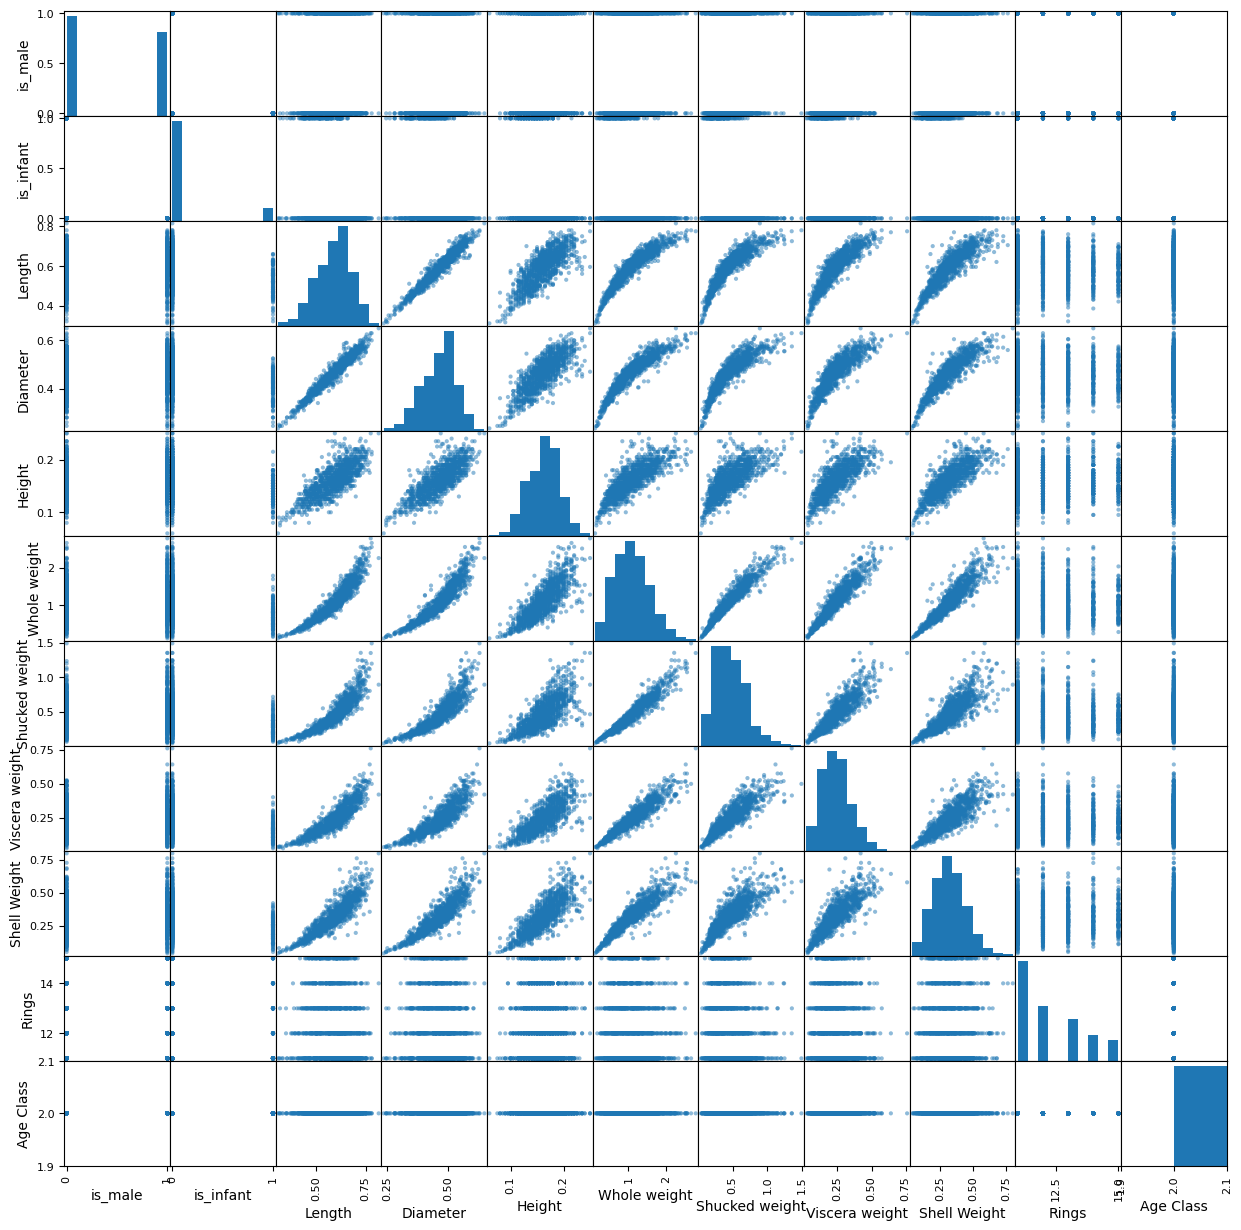

In [14]:
df_class3 = df[df['Age Class'] == 2]
pd.plotting.scatter_matrix(df_class3,figsize=(15, 15),diagonal='hist')
plt.show()

<Axes: >

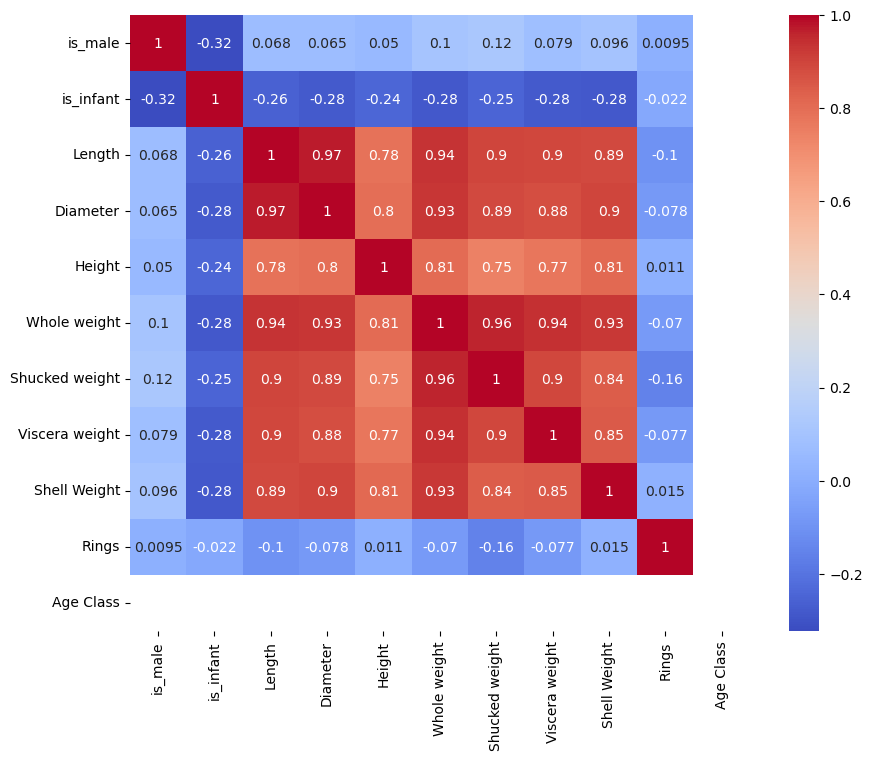

In [15]:
corr = df_class3.corr() 
plt.figure(figsize=(10,8))
sb.heatmap(corr, annot = True, cmap='coolwarm')


C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


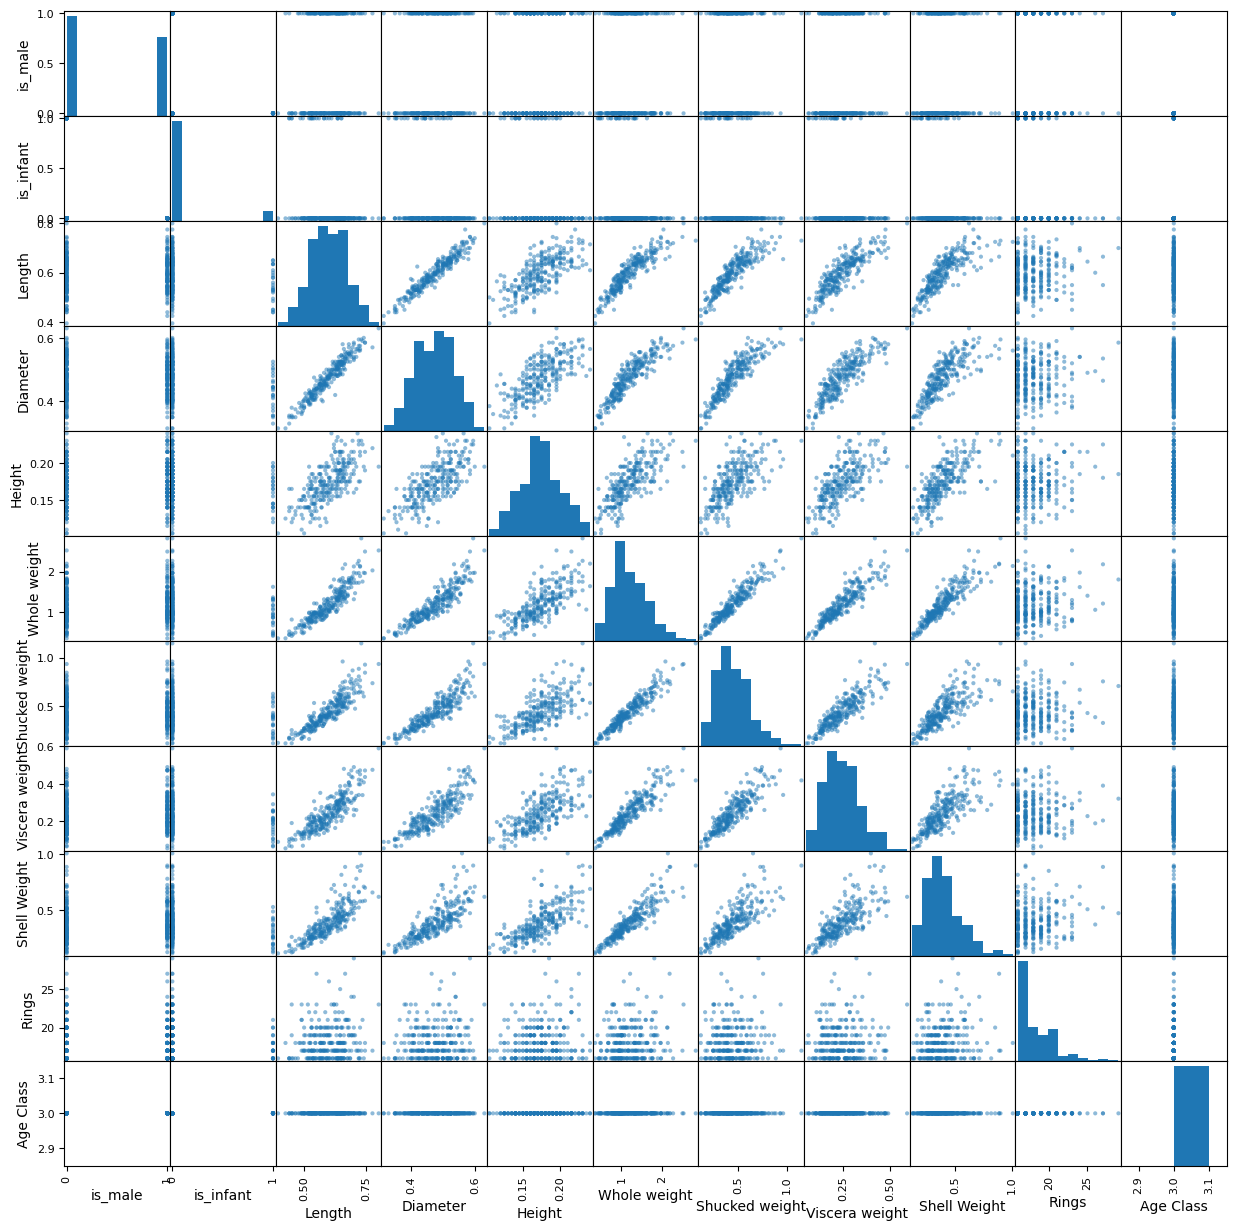

In [16]:
df_class4 = df[df['Age Class'] == 3]
pd.plotting.scatter_matrix(df_class4,figsize=(15, 15),diagonal='hist')
plt.show()

<Axes: >

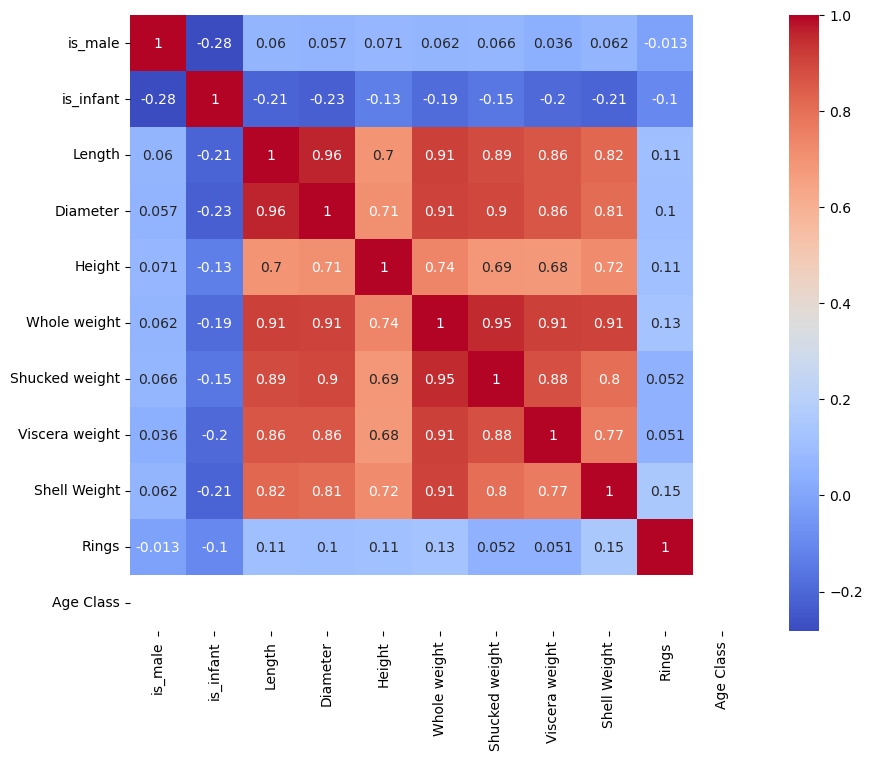

In [17]:
corr = df_class4.corr() 
plt.figure(figsize=(10,8))
sb.heatmap(corr, annot = True, cmap='coolwarm')


## PCA

In [161]:
df2 = df.drop(columns = ['Rings'])
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(df2.iloc[:,0:-1])
print(pca.explained_variance_ratio_,'explained_variance_ratio')

[0.62842471 0.25549892] explained_variance_ratio


In [162]:
pca2 = pd.DataFrame(pca_result,columns = ['pca1','pca2'])
pca2['Age Class'] = df['Age Class']
pca2

pca1      pca2  Age Class
0     0.188669  0.775079          2
1    -0.062216  0.991828          0
2    -0.103128 -0.113378          1
3     0.189233  0.774655          1
4    -1.074963  0.058865          0
...        ...       ...        ...
4172  0.080416 -0.272179          2
4173  0.576145  0.439957          1
4174  0.749678  0.289899          1
4175  0.268464 -0.435060          1
4176  1.386227 -0.261638          2

[4177 rows x 3 columns]

C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


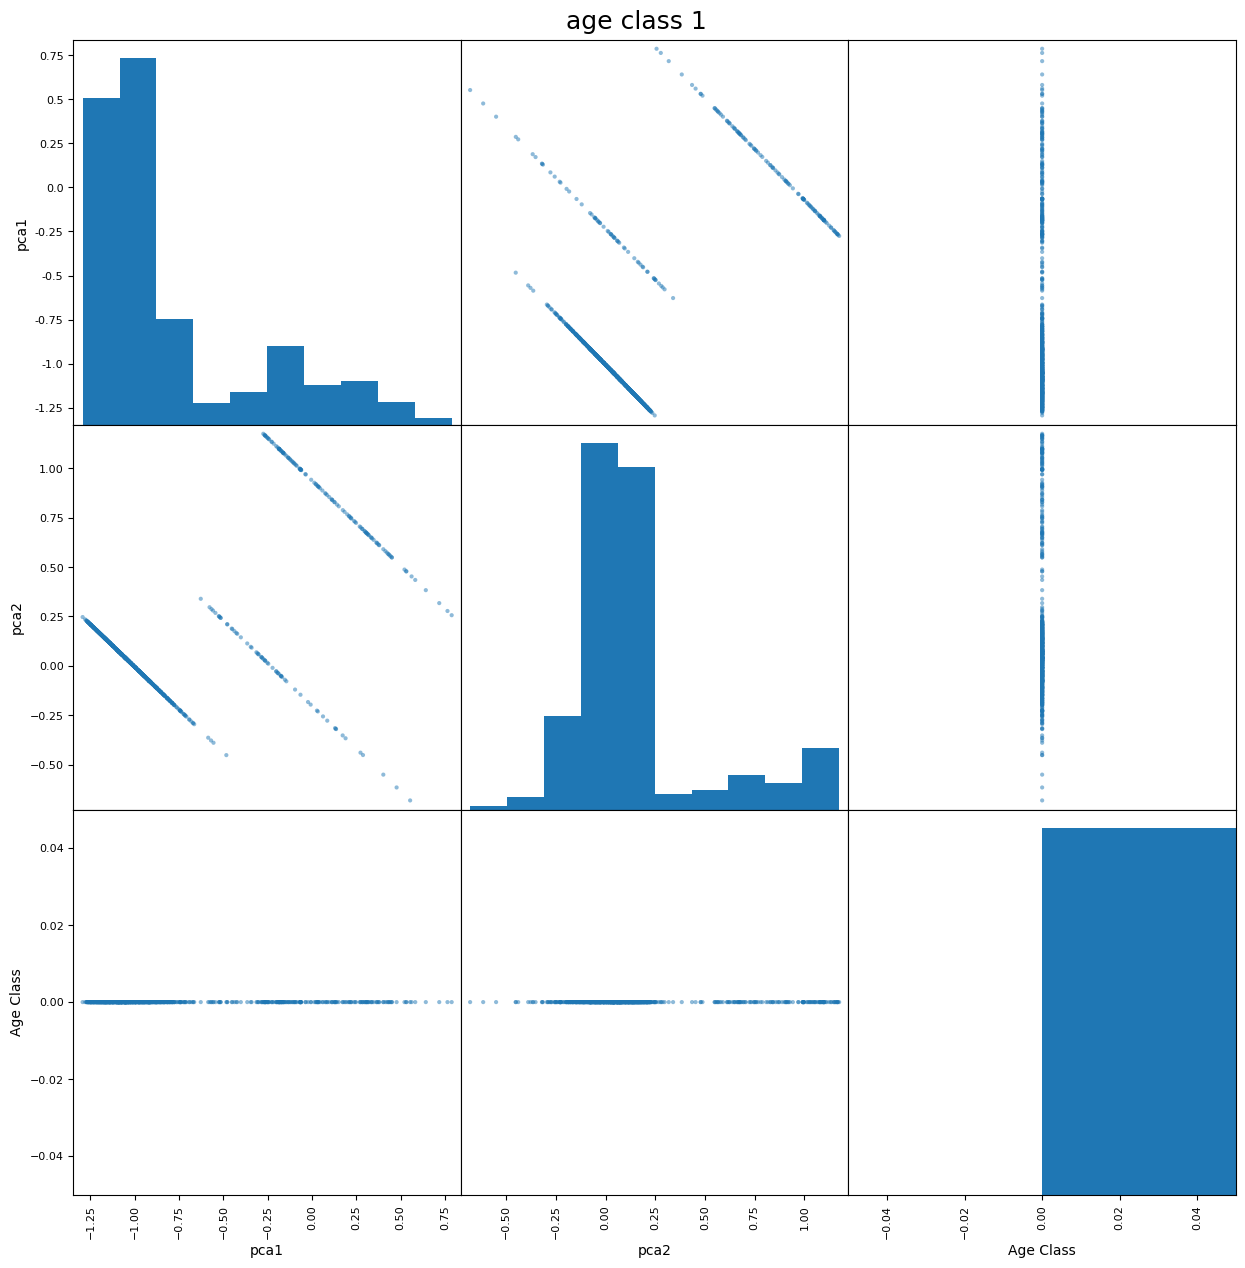

In [163]:
pd.plotting.scatter_matrix(pca2[pca2['Age Class'] == 0],figsize=(15, 15),diagonal='hist')
plt.suptitle("age class 1",fontsize=18, y=0.9)
plt.show()

C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


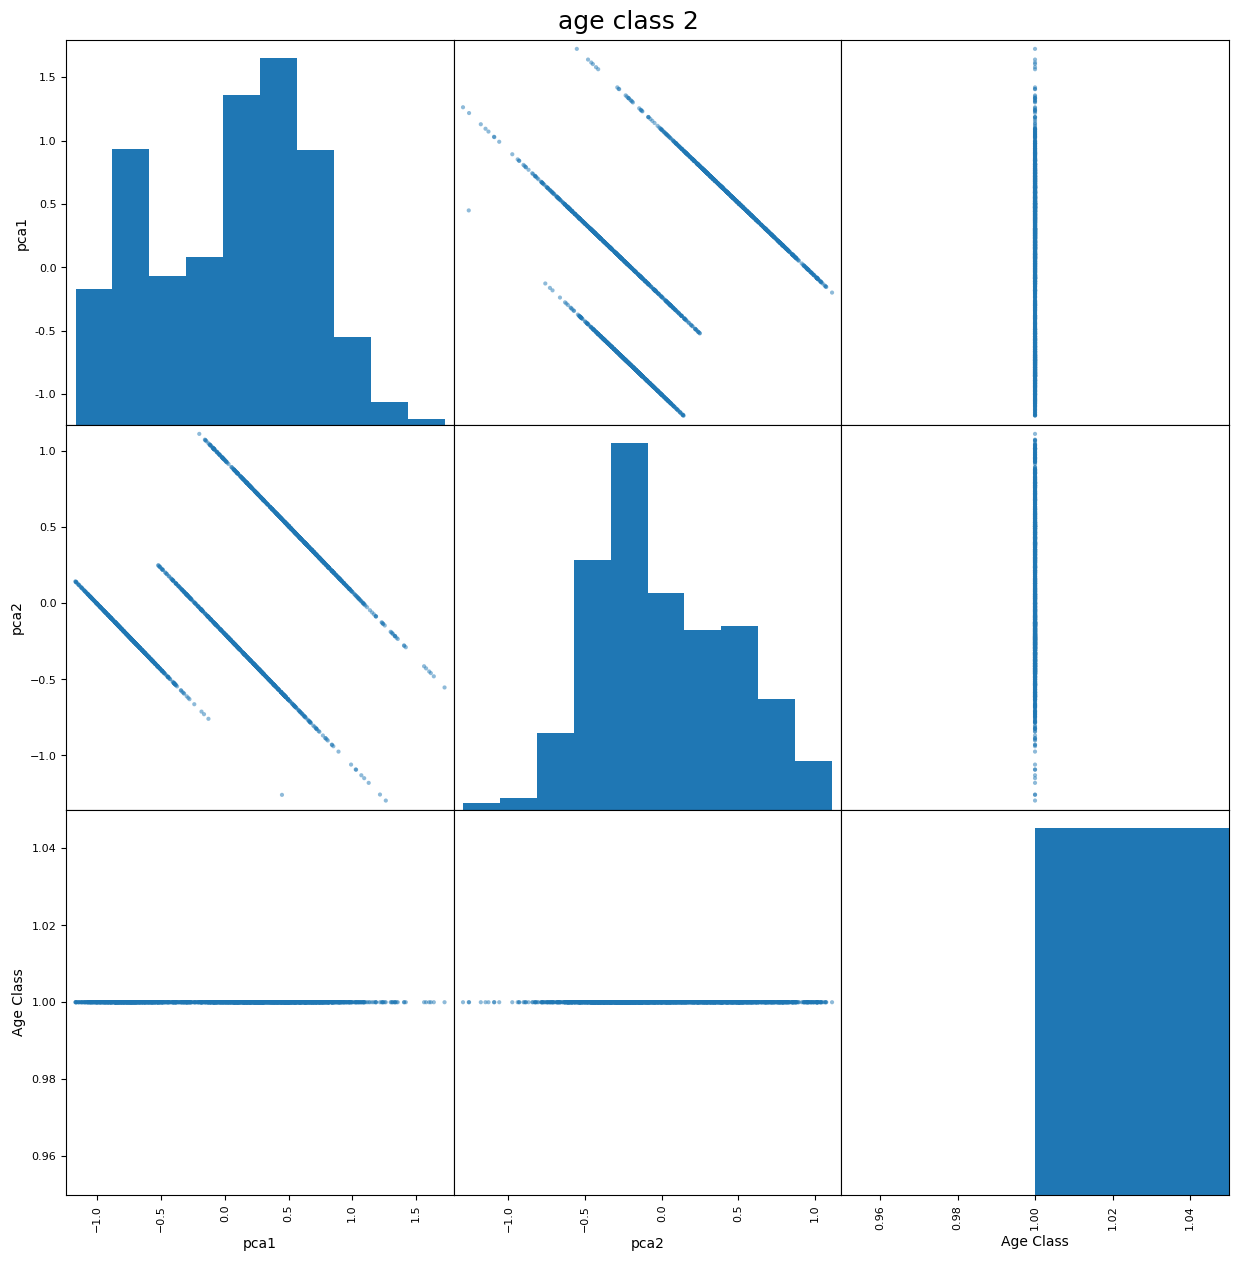

In [164]:
pd.plotting.scatter_matrix(pca2[pca2['Age Class'] == 1],figsize=(15, 15),diagonal='hist')
plt.suptitle("age class 2",fontsize=18, y=0.9)
plt.show()

C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


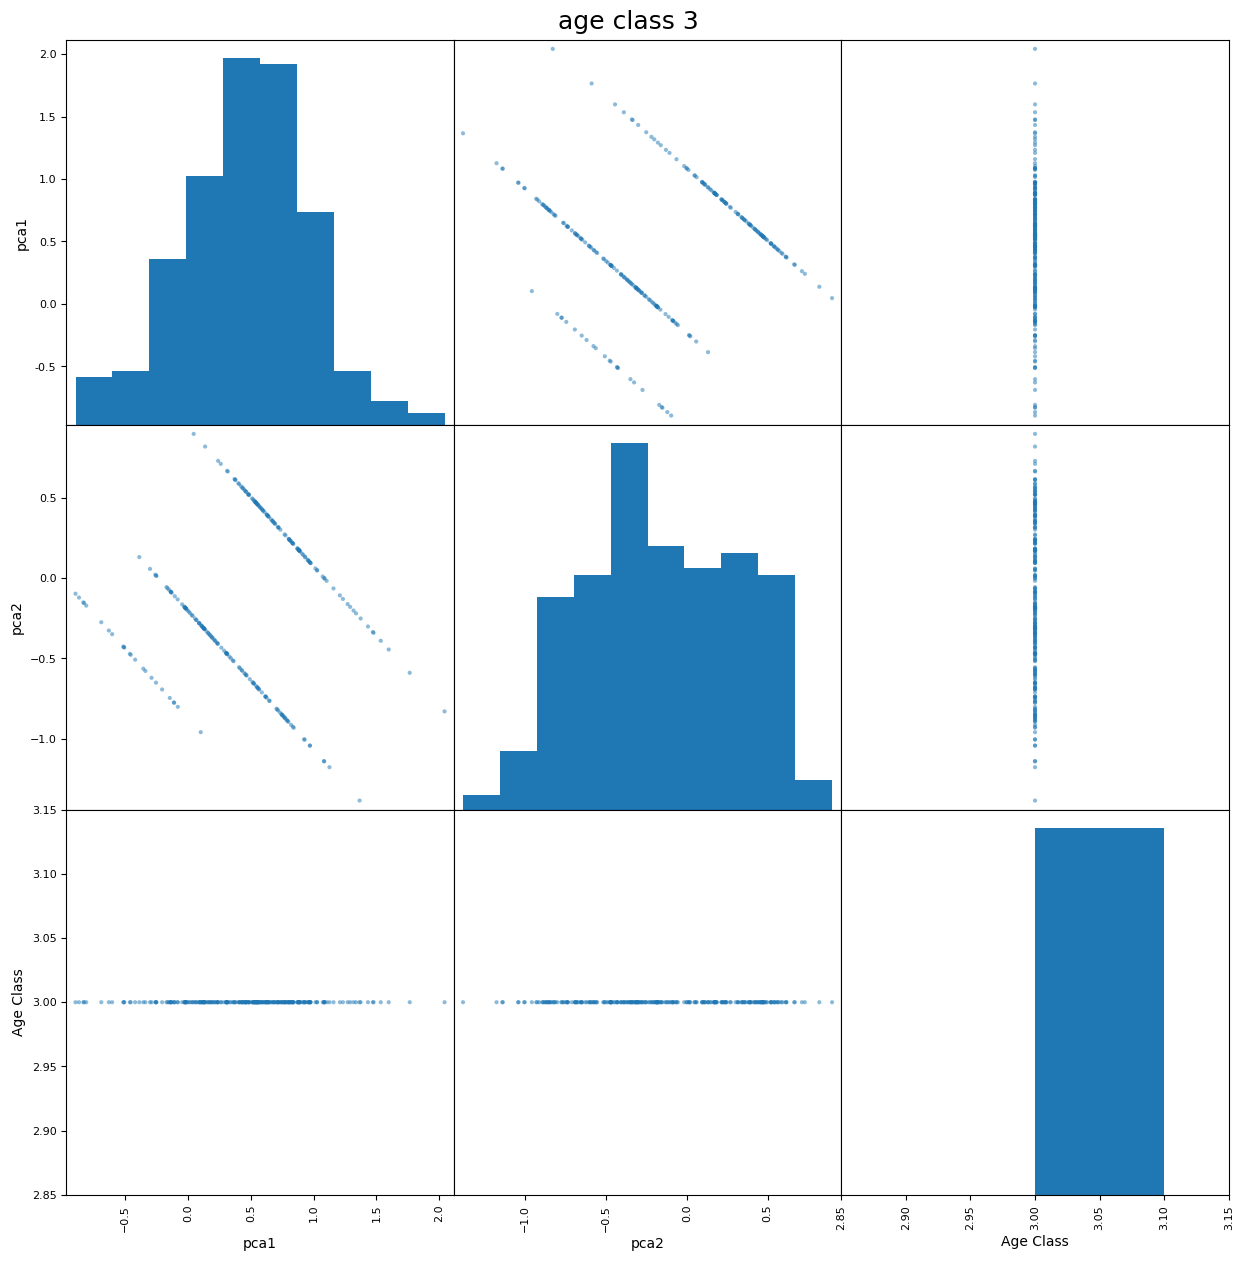

In [165]:
pd.plotting.scatter_matrix(pca2[pca2['Age Class'] == 3],figsize=(15, 15),diagonal='hist')
plt.suptitle("age class 3",fontsize=18, y=0.9)
plt.show()

C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


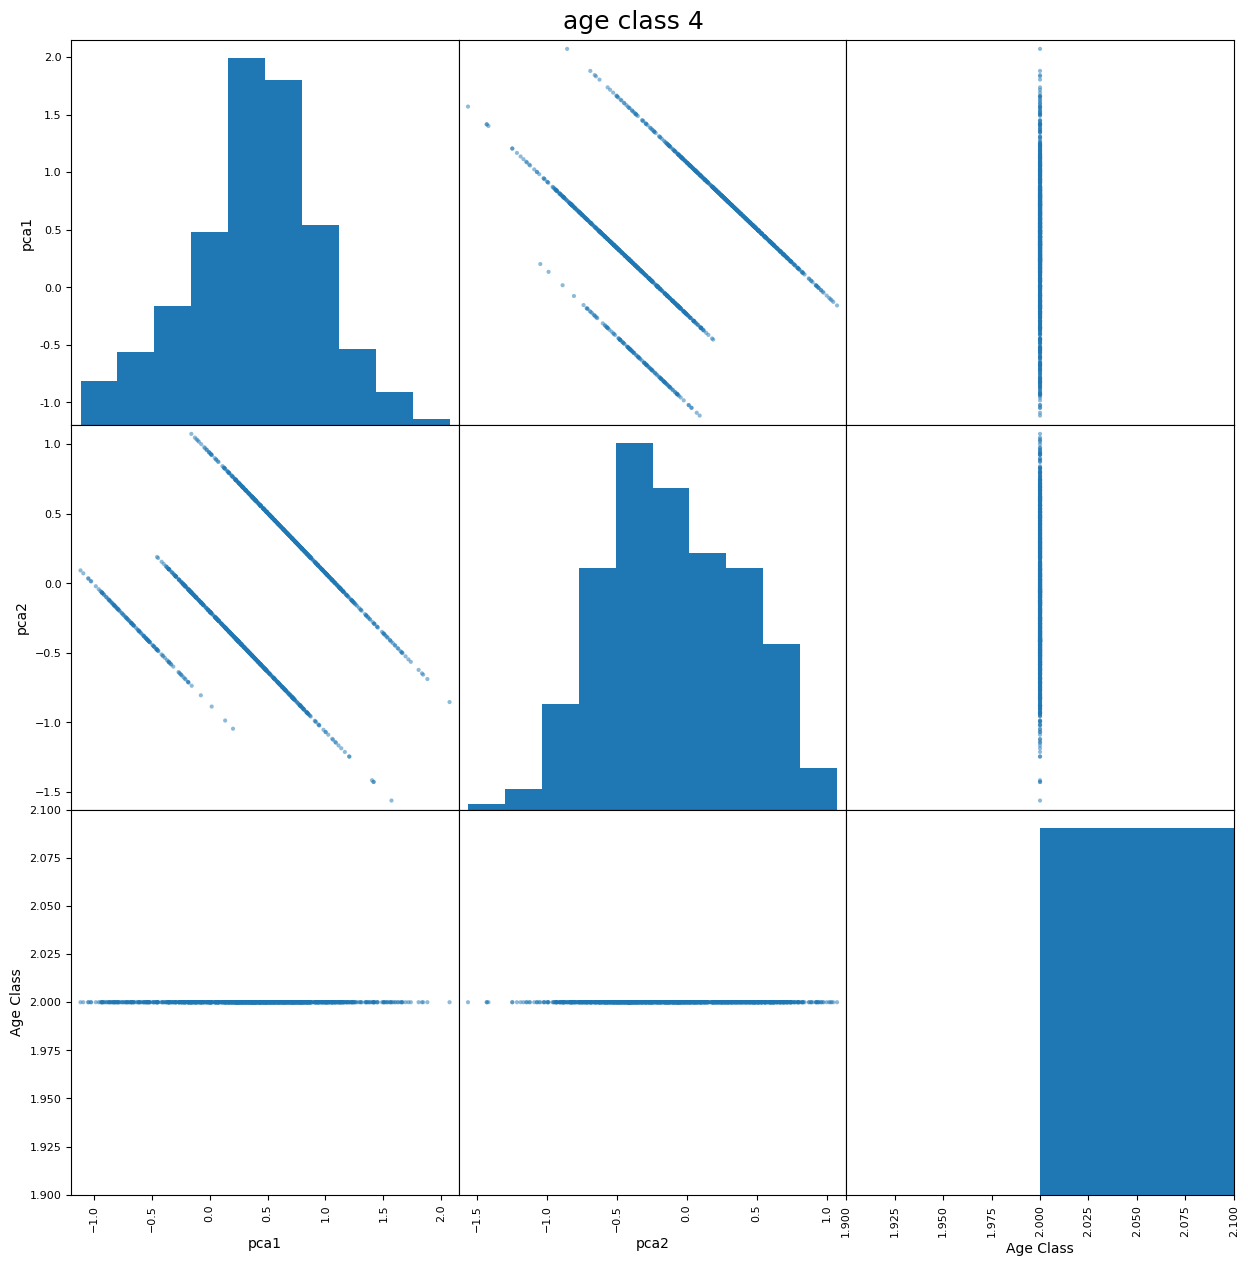

In [166]:
pd.plotting.scatter_matrix(pca2[pca2['Age Class'] == 2],figsize=(15, 15),diagonal='hist')
plt.suptitle("age class 4",fontsize=18, y=0.9)
plt.show()

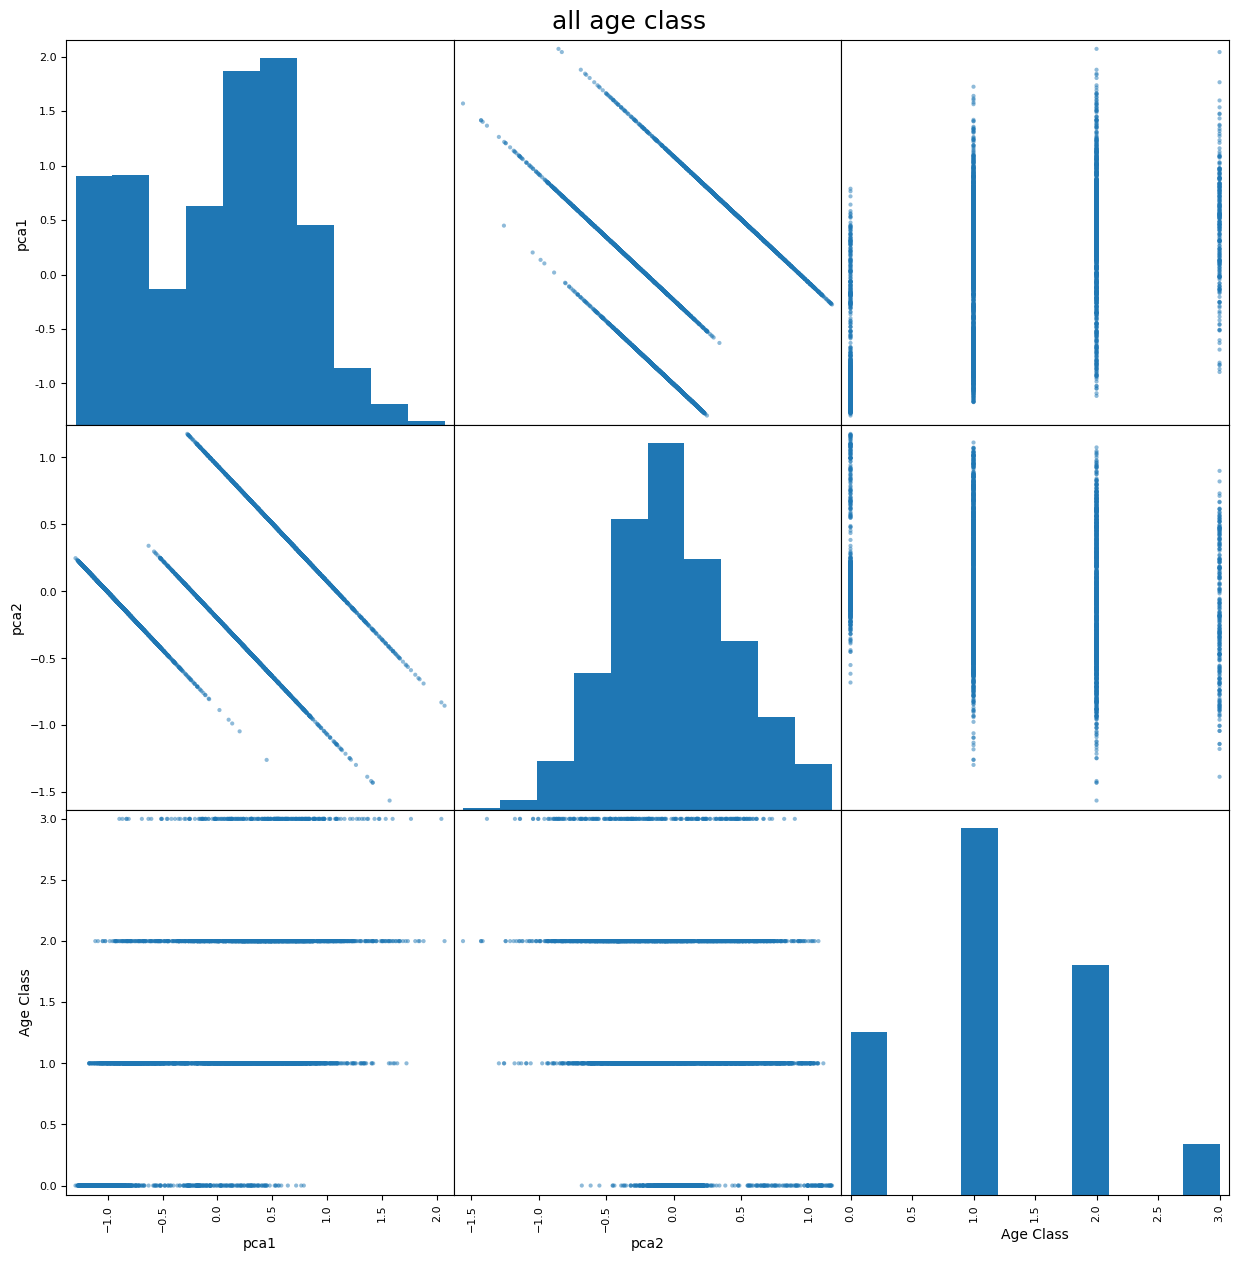

In [167]:
pd.plotting.scatter_matrix(pca2,figsize=(15, 15),diagonal='hist')
plt.suptitle("all age class",fontsize=18, y=0.9)
plt.show()

#### Note from Chris: Not optimal for 2 pca components, could try three to see if they could explain 95% of variance

## Tree

In [25]:
df2

is_male  is_infant  Length  Diameter  Height  Whole weight  \
0           1          0   0.455     0.365   0.095        0.5140   
1           1          0   0.350     0.265   0.090        0.2255   
2           0          0   0.530     0.420   0.135        0.6770   
3           1          0   0.440     0.365   0.125        0.5160   
4           0          1   0.330     0.255   0.080        0.2050   
...       ...        ...     ...       ...     ...           ...   
4172        0          0   0.565     0.450   0.165        0.8870   
4173        1          0   0.590     0.440   0.135        0.9660   
4174        1          0   0.600     0.475   0.205        1.1760   
4175        0          0   0.625     0.485   0.150        1.0945   
4176        1          0   0.710     0.555   0.195        1.9485   

      Shucked weight  Viscera weight  Shell Weight  Age Class  
0             0.2245          0.1010        0.1500          2  
1             0.0995          0.0485        0.0700          0  
2             0.2565          0.1415        0.2100          1  
3             0.2155          0.1140        0.1550          1  
4             0.0895          0.0395        0.0550          0  
...              ...             ...           ...        ...  
4172          0.3700          0.2390        0.2490          2  
4173          0.4390          0.2145        0.2605          1  
4174          0.5255          0.2875        0.3080          1  
4175          0.5310          0.2610        0.2960          1  
4176          0.9455          0.3765        0.4950          2  

[4177 rows x 10 columns]

In [146]:
def data_split(df,normalize,seed):
    data_x = df.iloc[:,0:-1]
    data_y = df.iloc[:,-1]

    if normalize == 1:
        transformer = Normalizer().fit(data_x)
        data_x = transformer.transform(data_x)

    x_train,x_test,y_train,y_test = train_test_split(data_x,data_y, test_size = 0.4, random_state = seed, stratify = data_y)

    return x_train,x_test,y_train,y_test

In [147]:
def model_selection(x_train,x_test,y_train,y_test, modeltype, hidden, maxit,learn_rate, solver, crit, depth, leaf):
    if modeltype ==0:#nn
        model = MLPClassifier(hidden_layer_sizes = (hidden,),random_state = 42, max_iter = maxit, solver = solver, learning_rate_init = learn_rate)
        model.fit(x_train, y_train)
        #model = Sequential()
       # model.add(Dense(hidden, input_dim = x_train.shape[1],activation = 'relu'))
       #model.add(Dense(4, activation = 'softmax'))
        #model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
        
        #history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 500, batch_size = 10,verbose = 0)
        #result_train = model.evaluate(x_train, y_train, verbose = 0)
        #result_test = model.evaluate(x_test, y_test, verbose = 0)

        #plt.plot(history.history['accuracy'], label = 'train accuracy')
        #plt.plot(history.history['val_accuracy'], label = 'test accuracy')
        #plt.legend()
        #plt.title(solver)
        #plt.savefig(f"{solver} metrics.png")
        #plt.show()
    
    elif modeltype == 1:#tree
        model = DecisionTreeClassifier( 
            criterion = crit, random_state = 100, 
            max_depth = depth, min_samples_leaf = leaf) 
        model.fit(x_train, y_train)

    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train) 
    acc_test = accuracy_score(y_test,y_pred_test) 
    acc_train = accuracy_score(y_train,y_pred_train) 
    prec_test = precision_score(y_test,y_pred_test,average='macro') 
    prec_train = precision_score(y_train,y_pred_train,average='macro') 
    f1_test = f1_score(y_test,y_pred_test,average='macro') 
    f1_train = f1_score(y_train,y_pred_train,average='macro') 
    cm = confusion_matrix(y_test,y_pred_test) 
    print(cm, 'is confusion matrix')
    y_pred = model.predict_proba(x_test)
    auc = roc_auc_score(y_test, y_pred,multi_class = 'ovr',average=None) 
    if modeltype == 0:
        out = {
            'solver':solver,
            'hidden layer size':hidden,
            'max iter':maxit,
            'learning rate':learn_rate,
            'test acc' : acc_test,
            'train acc' : acc_train,
            'test precision':prec_test,
            'train precision':prec_train,
            'test f1':f1_test,
            'train f1':f1_train 
        }
    elif modeltype == 1:
        out = {
            'criterion':crit,
            'max depth':depth,
            'min sample leaf':leaf,
            'test acc' : acc_test,
            'train acc' : acc_train,
            'test precision':prec_test,
            'train precision':prec_train,
            'test f1':f1_test,
            'train f1':f1_train 
        }
    return out,model,auc

In [148]:
x_train,x_test,y_train,y_test = data_split(df2,0,1)
out,model,auc = model_selection(x_train,x_test,y_train,y_test,1,1,1,1,1,'entropy',5,5)

[[255  78   2   1]
 [ 63 572 122   0]
 [  5 252 207  10]
 [  0  25  62  17]] is confusion matrix


In [149]:
out

{'criterion': 'entropy',
 'max depth': 5,
 'min sample leaf': 5,
 'test acc': 0.6289646918013165,
 'train acc': 0.6568236233040702,
 'test precision': 0.6350945818250014,
 'train precision': 0.6732147684959799,
 'test f1': 0.5470797933035821,
 'train f1': 0.5916373710612756}

In [30]:
auc

array([0.94240347, 0.73625737, 0.76497503, 0.84972203])

In [31]:
max_dep = [3,5,7,9,11]
min_leaf = [1,2,5,8,10]
crit = ['gini','entropy']
count = 1
res =[]
for i in crit:
    for j in max_dep:
        for k in min_leaf:
            x_train,x_test,y_train,y_test = data_split(df2,0,count)
            out,model,auc = model_selection(x_train,x_test,y_train,y_test,1,1,1,1,1,i,j,k)
            print(out)
            res.append(out)
            count+=1
            

[[234  97   5   0]
 [ 44 501 212   0]
 [  7 191 276   0]
 [  0  31  73   0]] is confusion matrix
{'criterion': 'gini', 'max depth': 3, 'min sample leaf': 1, 'test acc': 0.6050269299820467, 'train acc': 0.6013567438148444, 'test precision': 0.47991518754224183, 'train precision': 0.4763577462648852, 'test f1': 0.4799440147493689, 'train f1': 0.4760979029871901}
[[235 100   1   0]
 [ 63 537 157   0]
 [  6 230 238   0]
 [  0  35  69   0]] is confusion matrix
{'criterion': 'gini', 'max depth': 3, 'min sample leaf': 2, 'test acc': 0.604428485936565, 'train acc': 0.6225059856344772, 'test precision': 0.47004948837206384, 'train precision': 0.4857520582254625, 'test f1': 0.47216879905953973, 'train f1': 0.48992606152996604}
[[237  99   0   0]
 [ 62 645  50   0]
 [  7 344 123   0]
 [  0  57  47   0]] is confusion matrix
{'criterion': 'gini', 'max depth': 3, 'min sample leaf': 5, 'test acc': 0.6014362657091562, 'train acc': 0.6177174780526736, 'test precision': 0.47422987257626353, 'train preci

C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: Undefine

[[242  91   2   1]
 [ 57 570 122   8]
 [  5 248 192  29]
 [  0  23  52  29]] is confusion matrix
{'criterion': 'gini', 'max depth': 7, 'min sample leaf': 1, 'test acc': 0.6181926989826452, 'train acc': 0.7142857142857143, 'test precision': 0.5905538914354677, 'train precision': 0.7576751314056593, 'test f1': 0.5566109721755603, 'train f1': 0.6740216408754875}
[[245  83   8   0]
 [ 88 545 123   1]
 [ 12 244 200  18]
 [  1  22  60  21]] is confusion matrix
{'criterion': 'gini', 'max depth': 7, 'min sample leaf': 2, 'test acc': 0.6050269299820467, 'train acc': 0.7098962490023942, 'test precision': 0.5885552809391693, 'train precision': 0.7360428194170312, 'test f1': 0.5331938553604192, 'train f1': 0.656546358976745}
[[257  77   2   0]
 [ 71 548 125  13]
 [ 15 233 179  47]
 [  1  17  58  28]] is confusion matrix
{'criterion': 'gini', 'max depth': 7, 'min sample leaf': 5, 'test acc': 0.6056253740275285, 'train acc': 0.6911412609736632, 'test precision': 0.545829699370397, 'train precision':

C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: Undefine

{'criterion': 'entropy', 'max depth': 5, 'min sample leaf': 8, 'test acc': 0.6175942549371634, 'train acc': 0.6532322426177175, 'test precision': 0.5881796658625927, 'train precision': 0.665210598626116, 'test f1': 0.5473923730606198, 'train f1': 0.6016476526050569}
[[258  74   4   0]
 [ 84 518 153   2]
 [  8 230 230   6]
 [  1  31  59  13]] is confusion matrix
{'criterion': 'entropy', 'max depth': 5, 'min sample leaf': 10, 'test acc': 0.6098144823459006, 'train acc': 0.6496408619313647, 'test precision': 0.6192634713996934, 'train precision': 0.7073184404010536, 'test f1': 0.5256424909815834, 'train f1': 0.5551558572594086}
[[254  79   3   0]
 [ 79 503 173   2]
 [ 11 178 274  11]
 [  0  17  70  17]] is confusion matrix
{'criterion': 'entropy', 'max depth': 7, 'min sample leaf': 1, 'test acc': 0.6271693596648713, 'train acc': 0.6915403032721469, 'test precision': 0.6198308709936617, 'train precision': 0.7079587375803623, 'test f1': 0.5519749597972099, 'train f1': 0.630398263970846}
[[2

In [32]:
df_res= pd.DataFrame(res)
df_res

criterion  max depth  min sample leaf  test acc  train acc  test precision  \
0       gini          3                1  0.605027   0.601357        0.479915   
1       gini          3                2  0.604428   0.622506        0.470049   
2       gini          3                5  0.601436   0.617717        0.474230   
3       gini          3                8  0.618193   0.606943        0.489401   
4       gini          3               10  0.576302   0.612530        0.456565   
5       gini          5                1  0.637343   0.657622        0.652992   
6       gini          5                2  0.619988   0.659617        0.632890   
7       gini          5                5  0.602633   0.649641        0.577577   
8       gini          5                8  0.624776   0.667997        0.615102   
9       gini          5               10  0.625374   0.667199        0.614030   
10      gini          7                1  0.618193   0.714286        0.590554   
11      gini          7                2  0.605027   0.709896        0.588555   
12      gini          7                5  0.605625   0.691141        0.545830   
13      gini          7                8  0.608618   0.701915        0.565764   
14      gini          7               10  0.597247   0.702314        0.552985   
15      gini          9                1  0.611011   0.781724        0.564759   
16      gini          9                2  0.588869   0.777733        0.562351   
17      gini          9                5  0.600838   0.749401        0.564140   
18      gini          9                8  0.603830   0.727055        0.576778   
19      gini          9               10  0.594255   0.734637        0.546880   
20      gini         11                1  0.561939   0.866720        0.517348   
21      gini         11                2  0.576900   0.816840        0.528767   
22      gini         11                5  0.579294   0.785714        0.537273   
23      gini         11                8  0.588270   0.755387        0.555760   
24      gini         11               10  0.594255   0.736632        0.549129   
25   entropy          3                1  0.605625   0.601756        0.534558   
26   entropy          3                2  0.603830   0.591381        0.466113   
27   entropy          3                5  0.611610   0.608140        0.464222   
28   entropy          3                8  0.598444   0.615722        0.455808   
29   entropy          3               10  0.586475   0.624501        0.515687   
30   entropy          5                1  0.608019   0.646848        0.617275   
31   entropy          5                2  0.615799   0.658420        0.579379   
32   entropy          5                5  0.616996   0.648045        0.558163   
33   entropy          5                8  0.617594   0.653232        0.588180   
34   entropy          5               10  0.609814   0.649641        0.619263   
35   entropy          7                1  0.627169   0.691540        0.619831   
36   entropy          7                2  0.594255   0.700319        0.518270   
37   entropy          7                5  0.599641   0.697925        0.561397   
38   entropy          7                8  0.630162   0.691540        0.603071   
39   entropy          7               10  0.613405   0.695531        0.569517   
40   entropy          9                1  0.583483   0.779729        0.554603   
41   entropy          9                2  0.589467   0.754988        0.547203   
42   entropy          9                5  0.597247   0.749002        0.552643   
43   entropy          9                8  0.601436   0.731844        0.558158   
44   entropy          9               10  0.609216   0.716281        0.587874   
45   entropy         11                1  0.569120   0.863128        0.518939   
46   entropy         11                2  0.568522   0.843176        0.500258   
47   entropy         11                5  0.563136   0.770551        0.516034   
48   entropy         11           

depth = 5, min leaf = 1 give the best result and best balance between overfitting and under fitting.

In [33]:
x_train,x_test,y_train,y_test = data_split(df2,0,123)
out,model,auc = model_selection(x_train,x_test,y_train,y_test,1,1,1,1,1,'gini',5,1)
r = export_text(model)
print(r)

[[212 121   2   1]
 [ 42 523 187   5]
 [  6 217 237  14]
 [  0  26  59  19]] is confusion matrix
|--- feature_8 <= 0.11
|   |--- feature_8 <= 0.05
|   |   |--- feature_8 <= 0.04
|   |   |   |--- feature_2 <= 0.32
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.32
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_8 >  0.04
|   |   |   |--- feature_6 <= 0.06
|   |   |   |   |--- feature_7 <= 0.03
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  0.03
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  0.06
|   |   |   |   |--- feature_7 <= 0.05
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  0.05
|   |   |   |   |   |--- class: 0
|   |--- feature_8 >  0.05
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_6 <= 0.15
|   |   |   |   |--- feature_5 <= 0.24
|   |   |   |   |   |--- class: 1
|   |   |   |   |

some observation:

1. accuracy performance around 0.58-0.64;It is not much better than random guessing(50%)
2. will be overfitting when depth>7
3. simple tree makes more stable results, while deeper tree gives better number on metrics but overfitting result. 

Hence single tree is not performing well.

Try pruning:

In [34]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [35]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.10487580234314087


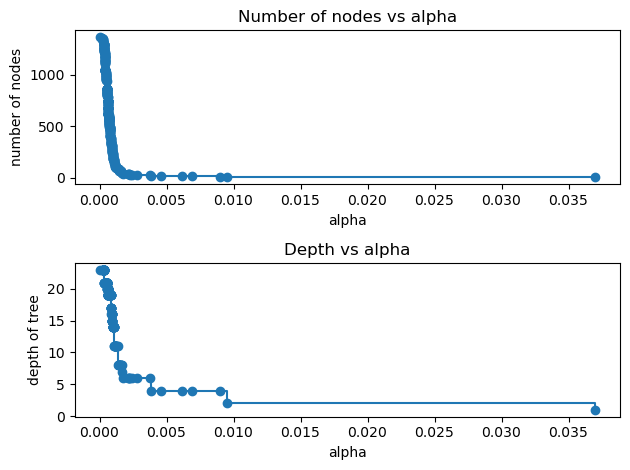

In [36]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

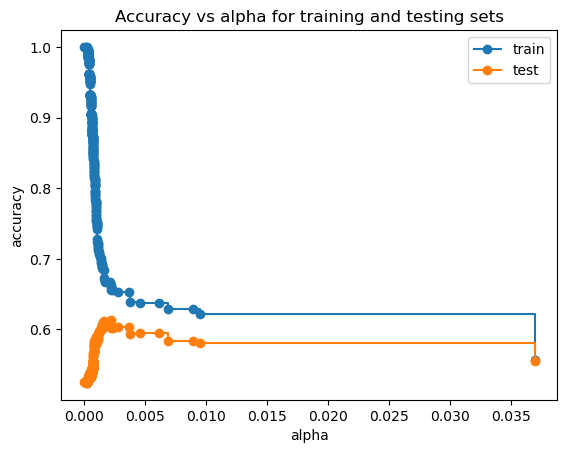

In [37]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [38]:
alpha_optimal = ccp_alphas[np.argmax(test_scores)]
alpha_optimal

np.float64(0.002179408643062118)

In [39]:
prunedTree = DecisionTreeClassifier(criterion = 'gini', random_state = 0, ccp_alpha = alpha_optimal)
prunedTree.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train) 
acc_test = accuracy_score(y_test,y_pred_test) 
acc_train = accuracy_score(y_train,y_pred_train) 
prec_test = precision_score(y_test,y_pred_test,average='macro') 
prec_train = precision_score(y_train,y_pred_train,average='macro') 
f1_test = f1_score(y_test,y_pred_test,average='macro') 
f1_train = f1_score(y_train,y_pred_train,average='macro') 
cm = confusion_matrix(y_test,y_pred_test) 
print(cm, 'is confusion matrix')
y_pred = model.predict_proba(x_test)
auc = roc_auc_score(y_test, y_pred,multi_class = 'ovr',average=None) 
out = {
        'test acc' : acc_test,
        'train acc' : acc_train,
        'test precision':prec_test,
        'train precision':prec_train,
        'test f1':f1_test,
        'train f1':f1_train
        
    }

print(out)

[[212 121   2   1]
 [ 42 523 187   5]
 [  6 217 237  14]
 [  0  26  59  19]] is confusion matrix
{'test acc': 0.5930580490724118, 'train acc': 0.664804469273743, 'test precision': 0.5952129639480724, 'train precision': 0.6985130409140128, 'test f1': 0.5269153905745784, 'train f1': 0.6089961677452724}


In [40]:
prun = export_text(prunedTree)
print(prun)

|--- feature_8 <= 0.11
|   |--- feature_8 <= 0.05
|   |   |--- class: 0
|   |--- feature_8 >  0.05
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|--- feature_8 >  0.11
|   |--- feature_8 <= 0.32
|   |   |--- feature_6 <= 0.34
|   |   |   |--- feature_8 <= 0.19
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.19
|   |   |   |   |--- feature_6 <= 0.29
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.29
|   |   |   |   |   |--- feature_8 <= 0.25
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_8 >  0.25
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_6 >  0.34
|   |   |   |--- feature_8 <= 0.25
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.25
|   |   |   |   |--- feature_6 <= 0.43
|   |   |   |   |   |--- class: 1


[Text(0.3125, 0.9285714285714286, 'x[8] <= 0.115\ngini = 0.67\nsamples = 2506\nvalue = [503.0, 1134.0, 712.0, 157.0]'),
 Text(0.08333333333333333, 0.7857142857142857, 'x[8] <= 0.054\ngini = 0.423\nsamples = 545\nvalue = [392, 132, 21, 0]'),
 Text(0.19791666666666666, 0.8571428571428572, 'True  '),
 Text(0.041666666666666664, 0.6428571428571429, 'gini = 0.131\nsamples = 187\nvalue = [174.0, 11.0, 2.0, 0.0]'),
 Text(0.125, 0.6428571428571429, 'x[1] <= 0.5\ngini = 0.512\nsamples = 358\nvalue = [218, 121, 19, 0]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.576\nsamples = 94\nvalue = [30.0, 52.0, 12.0, 0.0]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.424\nsamples = 264\nvalue = [188, 69, 7, 0]'),
 Text(0.5416666666666666, 0.7857142857142857, 'x[8] <= 0.32\ngini = 0.605\nsamples = 1961\nvalue = [111, 1002, 691, 157]'),
 Text(0.4270833333333333, 0.8571428571428572, '  False'),
 Text(0.3541666666666667, 0.6428571428571429, 'x[6] <= 0.338\ngini = 0.536\nsamples = 1265\nvalue = [107.0, 792.0, 3

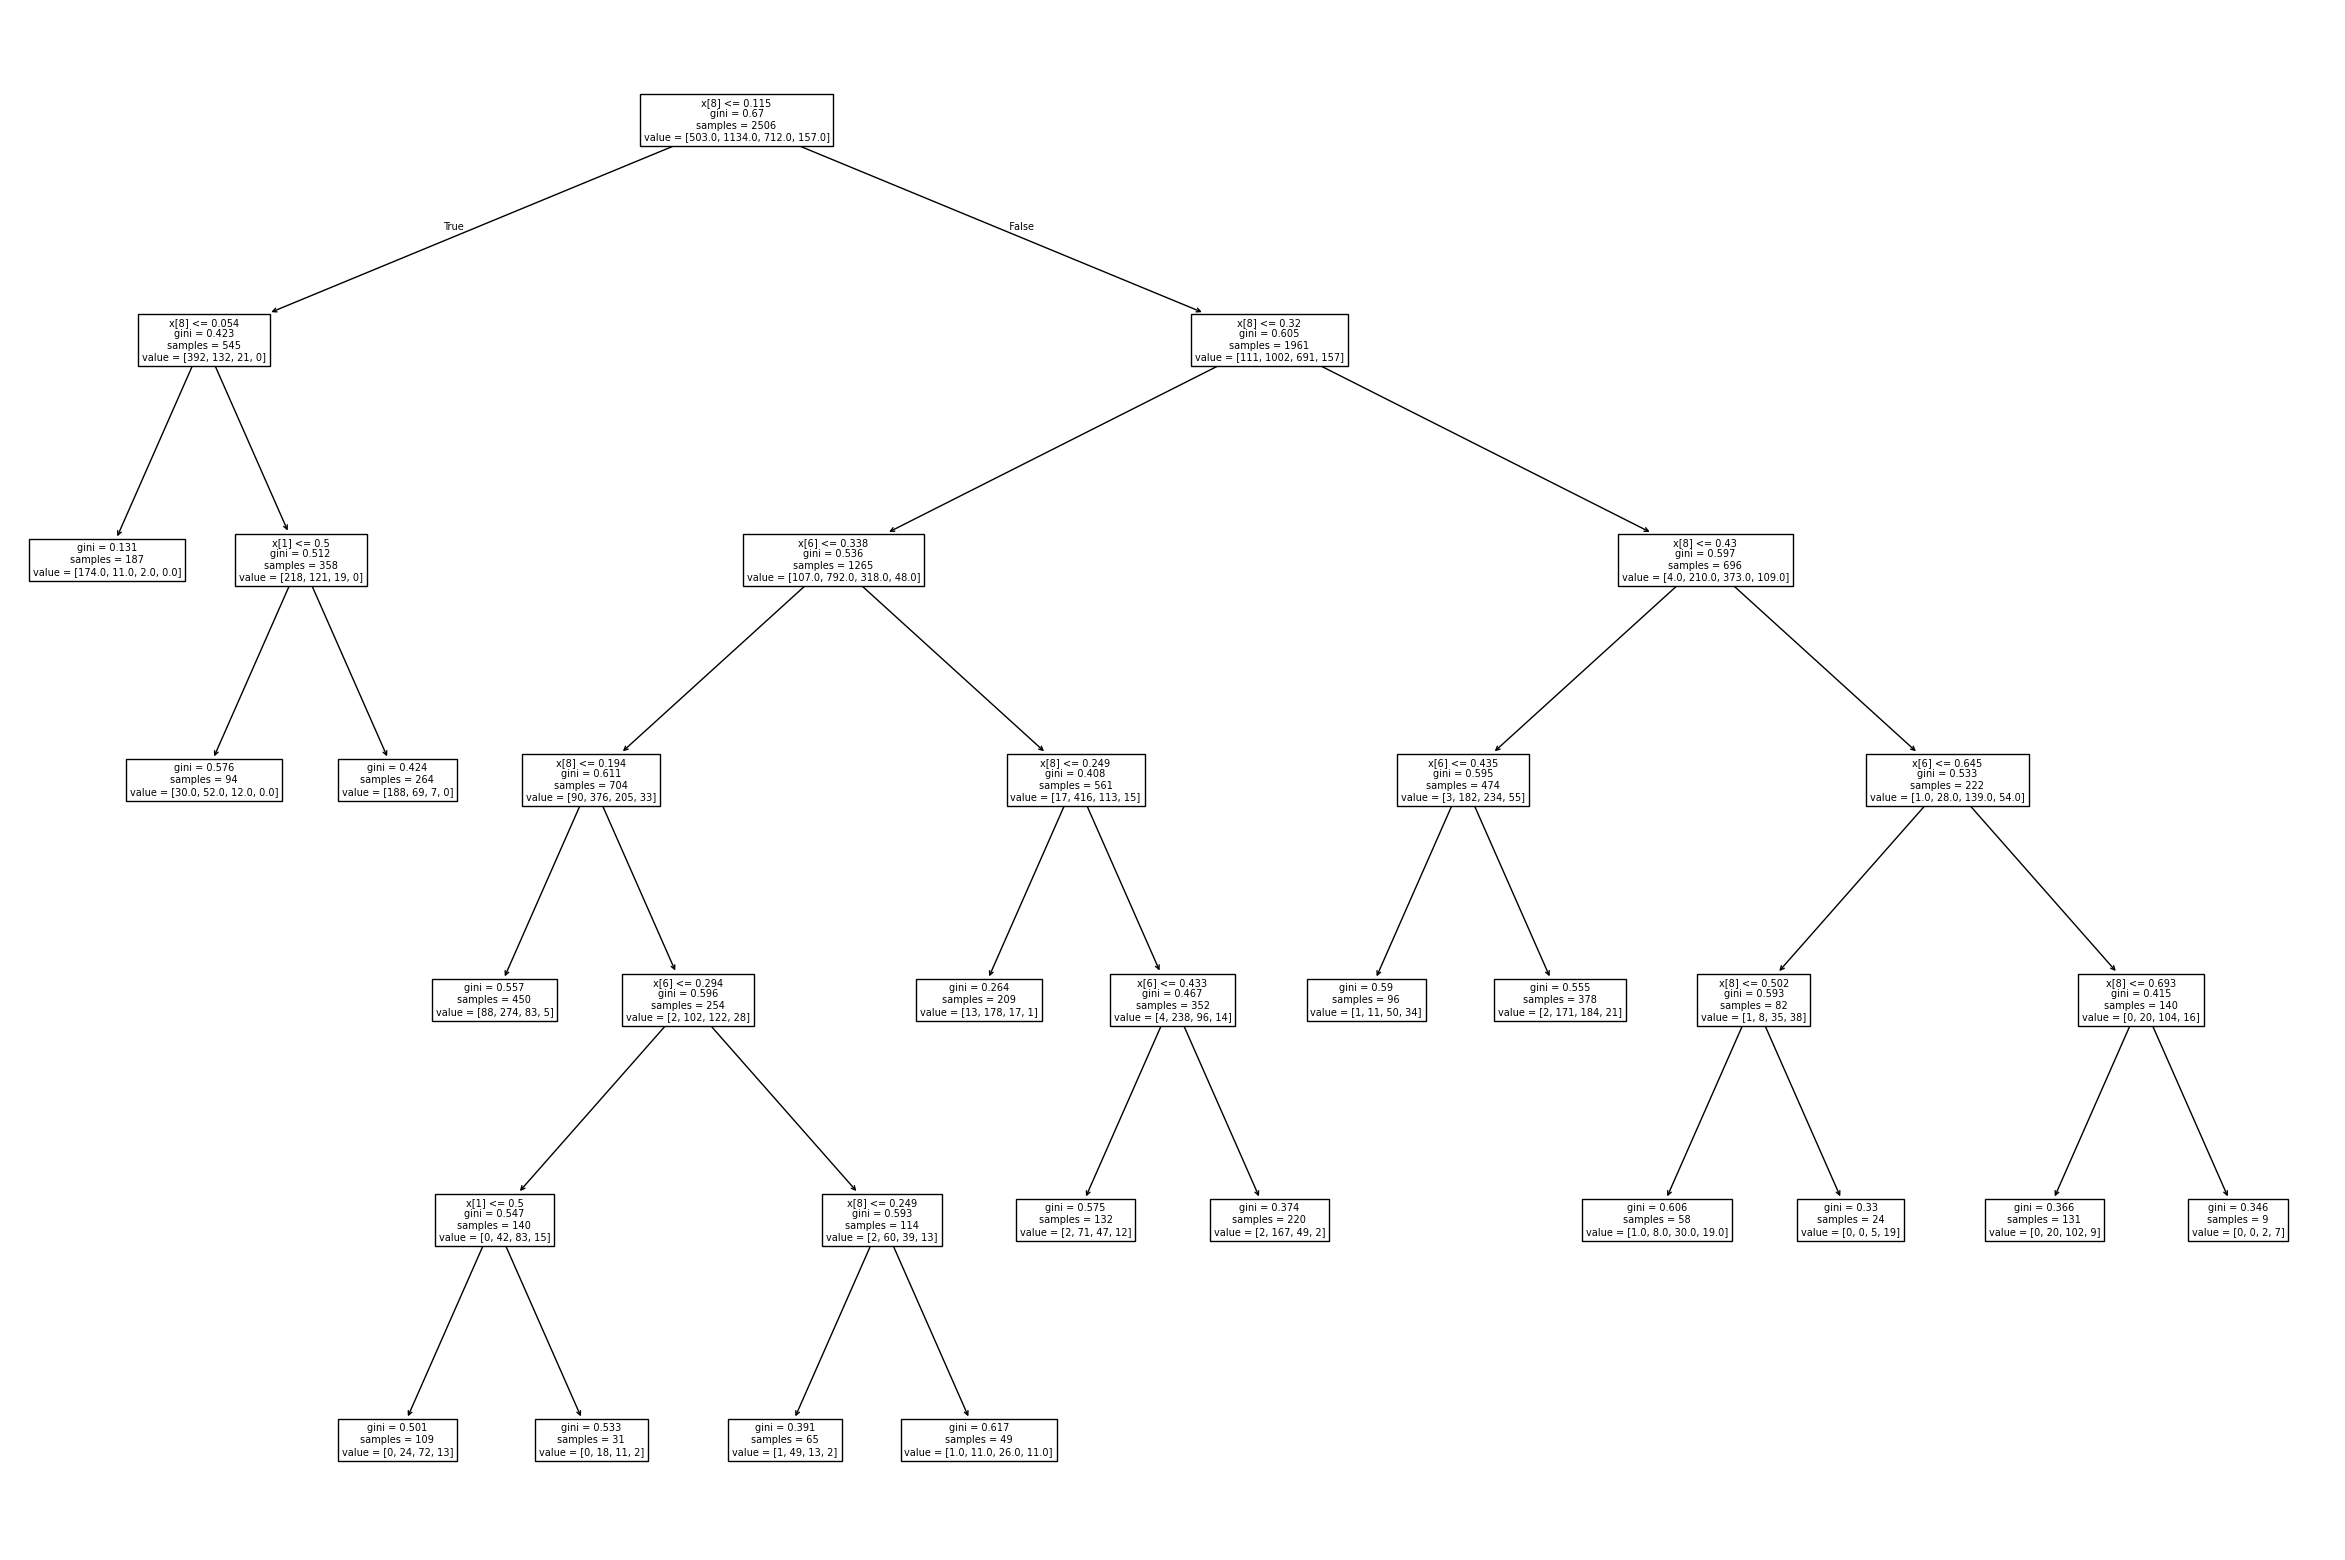

In [41]:
plt.figure(figsize = (30,20))
plot_tree(prunedTree)

a stabler result was acquired after post pruning. Maincontribution:
1. Balance between over-fitting and under-fitting
2. it approaches what the best a tree can do

Try random forest:


In [42]:
def rfgen(x_train,x_test,y_train,y_test,n, depth, leaf):
    model = RandomForestClassifier(n_estimators=n, max_depth = depth,max_leaf_nodes=leaf, n_jobs=-1)#the max depth we pick is 5 here; it is from the tree part.
    model.fit(x_train, y_train)

    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train) 
    acc_test = accuracy_score(y_test,y_pred_test) 
    acc_train = accuracy_score(y_train,y_pred_train) 
    prec_test = precision_score(y_test,y_pred_test,average='macro') 
    prec_train = precision_score(y_train,y_pred_train,average='macro') 
    f1_test = f1_score(y_test,y_pred_test,average='macro') 
    f1_train = f1_score(y_train,y_pred_train,average='macro') 
    cm = confusion_matrix(y_test,y_pred_test) 
    print(cm, 'is confusion matrix')
    y_pred = model.predict_proba(x_test)
    auc = roc_auc_score(y_test, y_pred,multi_class = 'ovr',average=None) 
    out = {
        'n of tree':n,
        'max depth': depth,
        'max leaf nodes':leaf,
        'test acc' : acc_test,
        'train acc' : acc_train,
        'test precision':prec_test,
        'train precision':prec_train,
        'test f1':f1_test,
        'train f1':f1_train,
        'auc': auc
        
    }
    return out,model,auc

In [43]:
n = [10,100,200,300,400,500,600,700]
count = 1
res_rf =[]
for i in n:        
    x_train,x_test,y_train,y_test = data_split(df2,0,count)
    out,model,auc = rfgen(x_train,x_test,y_train,y_test,i,5,16)
    res_rf.append(out)
    count+=1

[[239  96   1   0]
 [ 58 637  62   0]
 [ 10 313 150   1]
 [  0  53  47   4]] is confusion matrix
[[240  96   0   0]
 [ 66 621  70   0]
 [  6 285 183   0]
 [  0  34  70   0]] is confusion matrix


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[232 104   0   0]
 [ 67 633  57   0]
 [  7 318 149   0]
 [  0  48  56   0]] is confusion matrix
[[238  98   0   0]
 [ 58 621  78   0]
 [  3 306 165   0]
 [  0  32  71   1]] is confusion matrix
[[244  90   2   0]
 [ 64 582 111   0]
 [  8 260 206   0]
 [  0  31  70   3]] is confusion matrix
[[250  86   0   0]
 [ 60 622  75   0]
 [  5 283 186   0]
 [  0  41  62   1]] is confusion matrix


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[242  93   1   0]
 [ 57 590 110   0]
 [  7 279 188   0]
 [  0  30  74   0]] is confusion matrix
[[264  71   1   0]
 [ 80 584  93   0]
 [ 12 283 179   0]
 [  1  36  67   0]] is confusion matrix


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
rf_res= pd.DataFrame(res_rf)
rf_res

n of tree  max depth  max leaf nodes  test acc  train acc  test precision  \
0         10          5              16  0.616397   0.624900        0.683761   
1        100          5              16  0.624776   0.650838        0.483804   
2        200          5              16  0.606822   0.634876        0.475190   
3        300          5              16  0.613405   0.639266        0.727244   
4        400          5              16  0.619390   0.648045        0.726519   
5        500          5              16  0.633752   0.631684        0.743054   
6        600          5              16  0.610413   0.646848        0.472407   
7        700          5              16  0.614602   0.636872        0.466389   

   train precision   test f1  train f1  \
0         0.696958  0.477982  0.507839   
1         0.503656  0.473164  0.496413   
2         0.744421  0.452069  0.486827   
3         0.747355  0.468028  0.489050   
4         0.746274  0.489672  0.507439   
5         0.737516  0.487302  0.491378   
6         0.502410  0.468121  0.496633   
7         0.488543  0.469116  0.488143   

                                                 auc  
0  [0.9381420545746388, 0.7400780172800037, 0.765...  
1  [0.9332430444087746, 0.7463766335500319, 0.775...  
2  [0.9352238273586588, 0.7532858889605114, 0.783...  
3  [0.9452826823613341, 0.7662531182341906, 0.778...  
4  [0.9325084715534153, 0.751801566126799, 0.7682...  
5  [0.9452737649366862, 0.7601684063257879, 0.786...  
6  [0.9409755662564652, 0.7486826092863399, 0.762...  
7  [0.9384073479579098, 0.7567994126301854, 0.764...

Try varing other parameters:

In [45]:
depth = [1,2,5,7,10]
count = 1
res_dep =[]
for i in depth:        
    x_train,x_test,y_train,y_test = data_split(df2,0,count)
    out,model,auc = rfgen(x_train,x_test,y_train,y_test,500,i,16)
    res_dep.append(out)
    count+=1

C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[254  82   0   0]
 [ 80 677   0   0]
 [ 14 460   0   0]
 [  1 103   0   0]] is confusion matrix


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[247  89   0   0]
 [ 87 580  90   0]
 [ 13 283 178   0]
 [  0  54  50   0]] is confusion matrix


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[231 105   0   0]
 [ 67 631  59   0]
 [  8 320 146   0]
 [  0  46  58   0]] is confusion matrix


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[238  98   0   0]
 [ 60 614  83   0]
 [  3 283 188   0]
 [  0  23  81   0]] is confusion matrix
[[242  92   2   0]
 [ 64 569 124   0]
 [  8 229 237   0]
 [  0  22  81   1]] is confusion matrix


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
rf_dep= pd.DataFrame(res_dep)
rf_dep

n of tree  max depth  max leaf nodes  test acc  train acc  test precision  \
0        500          1              16  0.557151   0.551476        0.309974   
1        500          2              16  0.601436   0.599362        0.462026   
2        500          5              16  0.603232   0.633679        0.470658   
3        500          7              16  0.622382   0.647247        0.481983   
4        500         10              16  0.627768   0.659218        0.732097   

   train precision   test f1  train f1  \
0         0.303751  0.348220  0.344293   
1         0.458162  0.457686  0.461632   
2         0.741350  0.448672  0.479437   
3         0.501014  0.473572  0.493981   
4         0.501006  0.490462  0.510133   

                                                 auc  
0  [0.9079677189227751, 0.5901361183295804, 0.669...  
1  [0.929230203317282, 0.6862413245883064, 0.7433...  
2  [0.9354244694132334, 0.7523869125217879, 0.783...  
3  [0.9454264758337791, 0.7706215367004963, 0.783...  
4  [0.9335607276618513, 0.7573283923352864, 0.773...

In [47]:
lef = [4,8,12,16,20]
count = 1
res_leaf =[]
for i in lef:        
    x_train,x_test,y_train,y_test = data_split(df2,0,count)
    out,model,auc = rfgen(x_train,x_test,y_train,y_test,500,7,i)
    res_leaf.append(out)
    count+=1

C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[250  84   2   0]
 [ 77 574 106   0]
 [ 13 281 180   0]
 [  0  54  50   0]] is confusion matrix


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[240  96   0   0]
 [ 74 596  87   0]
 [  6 282 186   0]
 [  0  39  65   0]] is confusion matrix


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[237  99   0   0]
 [ 75 619  63   0]
 [  8 306 160   0]
 [  0  40  64   0]] is confusion matrix


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[240  96   0   0]
 [ 62 611  84   0]
 [  3 282 189   0]
 [  0  23  81   0]] is confusion matrix
[[245  89   2   0]
 [ 64 567 126   0]
 [  8 223 243   0]
 [  0  21  79   4]] is confusion matrix


In [48]:
rf_leaf= pd.DataFrame(res_leaf)
rf_leaf

n of tree  max depth  max leaf nodes  test acc  train acc  test precision  \
0        500          7               4  0.600838   0.596568        0.461471   
1        500          7               8  0.611610   0.624501        0.472162   
2        500          7              12  0.608019   0.637670        0.469971   
3        500          7              16  0.622382   0.652833        0.481135   
4        500          7              20  0.633752   0.672386        0.735718   

   train precision   test f1  train f1  \
0         0.455796  0.459749  0.455981   
1         0.481435  0.465820  0.479782   
2         0.490758  0.455727  0.483638   
3         0.505427  0.474034  0.499021   
4         0.719067  0.508700  0.535211   

                                                 auc  
0  [0.9342094703049759, 0.7105678871741211, 0.757...  
1  [0.9316379079721776, 0.7288697177907727, 0.764...  
2  [0.9342295345104333, 0.7511374508959412, 0.783...  
3  [0.9455234528268236, 0.7694255511650561, 0.783...  
4  [0.9344101123595506, 0.7601539533283809, 0.777...

In [61]:
res_leaf

[{'n of tree': 500,
  'max depth': 7,
  'max leaf nodes': 4,
  'test acc': 0.6008378216636745,
  'train acc': 0.5965682362330407,
  'test precision': 0.46147120515379325,
  'train precision': 0.4557964080183837,
  'test f1': 0.4597486810271957,
  'train f1': 0.45598128564666085,
  'auc': array([0.93420947, 0.71056789, 0.75759635, 0.77003461])},
 {'n of tree': 500,
  'max depth': 7,
  'max leaf nodes': 8,
  'test acc': 0.6116098144823459,
  'train acc': 0.6245011971268954,
  'test precision': 0.4721618223450177,
  'train precision': 0.48143494753813026,
  'test f1': 0.4658204308936301,
  'train f1': 0.47978209161056257,
  'auc': array([0.93163791, 0.72886972, 0.76476529, 0.84618453])},
 {'n of tree': 500,
  'max depth': 7,
  'max leaf nodes': 12,
  'test acc': 0.6080191502094554,
  'train acc': 0.6376695929768555,
  'test precision': 0.4699708016229598,
  'train precision': 0.490758326181156,
  'test f1': 0.45572663922753004,
  'train f1': 0.48363805778924907,
  'auc': array([0.93422953

Increasing the number of tree does not boost the performance of random forest significantly. In a reasonable rage(here 100-500) we could see slightly stable performance increasing, but it is more about random effects.

## Ensemble learning:
### XGBoost&Gradient Boosting

In [101]:
def boostgen(x_train,x_test,y_train,y_test,mode, n, depth):
    if mode == 0:#XGBoost
        modename = 'XGB'
        model = XGBClassifier(n_estimators = n, max_depth = depth, min_samples_leaf=5, learning_rate = 0.05)
        model.fit(x_train, y_train)
    elif mode == 1:
        modename = 'Gradient Boosting'
        model = GradientBoostingClassifier(n_estimators = n, max_depth = depth, min_samples_leaf=5, learning_rate = 0.01)
        model.fit(x_train, y_train)

    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train) 
    acc_test = accuracy_score(y_test,y_pred_test) 
    acc_train = accuracy_score(y_train,y_pred_train) 
    prec_test = precision_score(y_test,y_pred_test,average='macro') 
    prec_train = precision_score(y_train,y_pred_train,average='macro') 
    f1_test = f1_score(y_test,y_pred_test,average='macro') 
    f1_train = f1_score(y_train,y_pred_train,average='macro') 
    cm = confusion_matrix(y_test,y_pred_test) 
    print(cm, 'is confusion matrix')
    y_pred = model.predict_proba(x_test)
    auc = roc_auc_score(y_test, y_pred,multi_class = 'ovr',average=None) 

    out = {
        'type':modename,
        'n of tree':n,
        'max depth': depth,
        'test acc' : acc_test,
        'train acc' : acc_train,
        'test precision':prec_test,
        'train precision':prec_train,
        'test f1':f1_test,
        'train f1':f1_train,
        'auc': auc
        
    }
    return out,model,auc

In [176]:
x_train,x_test,y_train,y_test = data_split(df2,0,5)
out_xg,model_xg,auc_xg = boostgen(x_train,x_test,y_train,y_test,0,1000,1)

C:\anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[251  83   2   0]
 [ 70 569 116   2]
 [  9 223 235   7]
 [  0  21  69  14]] is confusion matrix


In [177]:
out_xg

{'type': 'XGB',
 'n of tree': 1000,
 'max depth': 1,
 'test acc': 0.639736684619988,
 'train acc': 0.6771747805267359,
 'test precision': 0.6403045983879522,
 'train precision': 0.711852902687945,
 'test f1': 0.546806254296472,
 'train f1': 0.5941129742194046,
 'auc': array([0.93481028, 0.75901867, 0.778021  , 0.88106561])}

In [178]:
x_train,x_test,y_train,y_test = data_split(df2,0,6)
out,model,auc = boostgen(x_train,x_test,y_train,y_test,1,1200,2)

[[257  79   0   0]
 [ 55 602  99   1]
 [  9 226 217  22]
 [  0  19  69  16]] is confusion matrix


In [179]:
out

{'type': 'Gradient Boosting',
 'n of tree': 1200,
 'max depth': 2,
 'test acc': 0.6535008976660682,
 'train acc': 0.713487629688747,
 'test precision': 0.6061559545532416,
 'train precision': 0.7655100706984784,
 'test f1': 0.5566870117924085,
 'train f1': 0.6741466547774014,
 'auc': array([0.9466816 , 0.77643887, 0.7906334 , 0.89008885])}

## XGBoost&Gradient boost under PCA condition 

In [168]:
pca3model= PCA(n_components=3)
pca3result = pca3model.fit_transform(df2.iloc[:, 0:-1])

In [169]:
pca3model.explained_variance_ratio_
sum(pca3model.explained_variance_ratio_)

np.float64(0.9889040659100281)

## When n = 2, sum of var is 0.88, when n =3, sum = 0.9889. There is no such a N that will lead to right about 95% or 98% variance.

In [171]:
pca3 = pd.DataFrame(pca3result,columns = ['pca1','pca2','pca3'])
pca3['Age Class'] = df['Age Class']
pca3

pca1      pca2      pca3  Age Class
0     0.188669  0.775079 -0.090166          2
1    -0.062216  0.991828 -0.212785          0
2    -0.103128 -0.113378 -0.496927          1
3     0.189233  0.774655 -0.090391          1
4    -1.074963  0.058865  0.111502          0
...        ...       ...       ...        ...
4172  0.080416 -0.272179 -0.405622          2
4173  0.576145  0.439957  0.101352          1
4174  0.749678  0.289899  0.186953          1
4175  0.268464 -0.435060 -0.310199          1
4176  1.386227 -0.261638  0.507952          2

[4177 rows x 4 columns]

In [181]:
x_train,x_test,y_train,y_test = data_split(pca3,0,7)
out_xg_pca,model_xg_pca,auc_xg_pca = boostgen(x_train,x_test,y_train,y_test,0,1000,1)

C:\anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:20:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[226 109   1   0]
 [ 45 636  76   0]
 [  6 346 122   0]
 [  0  70  34   0]] is confusion matrix


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [182]:
out_xg_pca

{'type': 'XGB',
 'n of tree': 1000,
 'max depth': 1,
 'test acc': 0.5888689407540395,
 'train acc': 0.6049481245011972,
 'test precision': 0.471823311079987,
 'train precision': 0.4897533947702628,
 'test f1': 0.43641707736580204,
 'train f1': 0.44818778381994673,
 'auc': array([0.93186419, 0.67794819, 0.71691095, 0.73502467])}

In [183]:
x_train,x_test,y_train,y_test = data_split(df2,0,6)
out_PCA,model_PCA,auc_PCA = boostgen(x_train,x_test,y_train,y_test,1,1200,2)

[[257  79   0   0]
 [ 55 602  99   1]
 [  9 226 217  22]
 [  0  19  69  16]] is confusion matrix


In [184]:
out_PCA

{'type': 'Gradient Boosting',
 'n of tree': 1200,
 'max depth': 2,
 'test acc': 0.6535008976660682,
 'train acc': 0.713487629688747,
 'test precision': 0.6061559545532416,
 'train precision': 0.7655100706984784,
 'test f1': 0.5566870117924085,
 'train f1': 0.6741466547774014,
 'auc': array([0.9466816 , 0.77643887, 0.79062988, 0.89008885])}

## SGD and ADAM

In [55]:
out_sgd,model_sgd,auc_sgd= model_selection(x_train,x_test,y_train,y_test, 0, 64, 1000, 0.05, 'sgd', 1, 1, 1)

[[255  80   1   0]
 [ 61 585 110   1]
 [  4 213 238  19]
 [  0  14  67  23]] is confusion matrix


In [56]:
out_sgd

{'solver': 'sgd',
 'hidden layer size': 64,
 'max iter': 1000,
 'learning rate': 0.05,
 'test acc': 0.6588868940754039,
 'train acc': 0.6472466081404629,
 'test precision': 0.6399259254895433,
 'train precision': 0.6508364664246635,
 'test f1': 0.5836791442257996,
 'train f1': 0.5837857850298286}

In [57]:
out_adam,model_adam,auc_adam= model_selection(x_train,x_test,y_train,y_test, 0, 64, 2000, 0.005, 'adam', 1, 1, 1)

[[251  84   1   0]
 [ 56 580 119   2]
 [  4 203 248  19]
 [  0  13  69  22]] is confusion matrix


In [58]:
out_adam

{'solver': 'adam',
 'hidden layer size': 64,
 'max iter': 2000,
 'learning rate': 0.005,
 'test acc': 0.6588868940754039,
 'train acc': 0.6544293695131684,
 'test precision': 0.6363246229688437,
 'train precision': 0.6574998671845178,
 'test f1': 0.5820696007861051,
 'train f1': 0.5910009111251643}

## Dropout+L1

In [197]:
def dropoutnn(x_train,x_test,y_train,y_test, l2r, drop,hidden,epoch):
    model = Sequential()
    model.add(Dense(hidden, input_dim=9, activation='relu',kernel_regularizer=l2(l2r)))
    model.add(Dropout(drop))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, verbose=0)

    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)


    y_train_pred = np.argmax(model.predict(x_train, verbose=0), axis=1)
    y_test_pred  = np.argmax(model.predict(x_test,  verbose=0), axis=1)
    train_prec = precision_score(y_train, y_train_pred, average='macro')
    test_prec  = precision_score(y_test,  y_test_pred,  average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1  = f1_score(y_test,  y_test_pred,  average='macro')
    print(f"Train: Acc:{train_acc:.3f}, Prec:{train_prec:.3f}, F1:{train_f1:.3f}")
    print(f"Test: Acc:{test_acc:.3f}, Prec:{test_prec:.3f}, F1:{test_f1:.3f}")
    cm = confusion_matrix(y_test, y_test_pred)
    print(cm)
    

    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='test_acc')
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='test_loss')
    plt.title(f'{l2r,drop,hidden}')
    plt.legend()
    

C:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: Acc:0.645, Prec:0.644, F1:0.557
Test: Acc:0.659, Prec:0.648, F1:0.563
[[252  83   1   0]
 [ 55 584 116   2]
 [  4 209 252   9]
 [  0  11  79  14]]


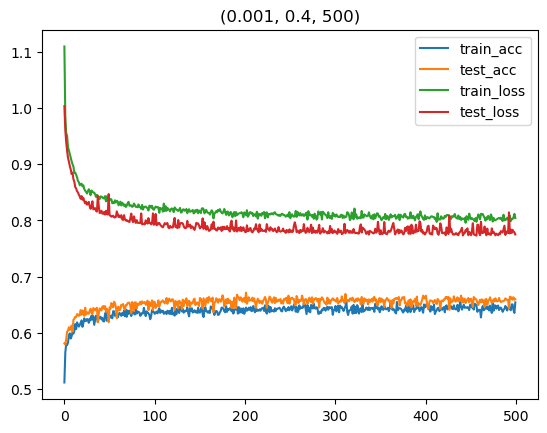

In [198]:
dropoutnn(x_train,x_test,y_train,y_test,0.001,0.4,500,500)

C:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: Acc:0.654, Prec:0.649, F1:0.609
Test: Acc:0.643, Prec:0.615, F1:0.587
[[254  81   1   0]
 [ 62 493 197   5]
 [  4 143 300  27]
 [  0   4  73  27]]


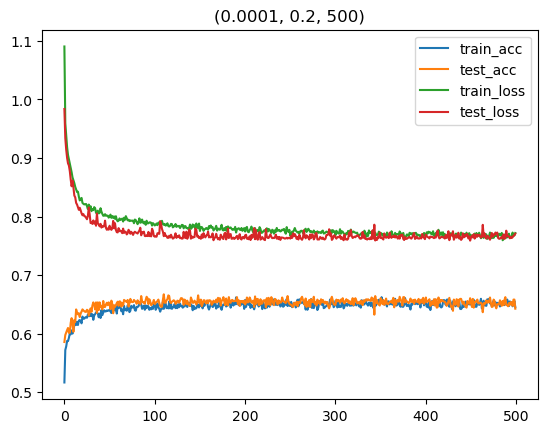

In [199]:
dropoutnn(x_train,x_test,y_train,y_test,0.0001,0.2,500,500)

C:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: Acc:0.663, Prec:0.656, F1:0.613
Test: Acc:0.656, Prec:0.619, F1:0.586
[[258  78   0   0]
 [ 65 590  98   4]
 [  5 220 220  29]
 [  0  11  65  28]]


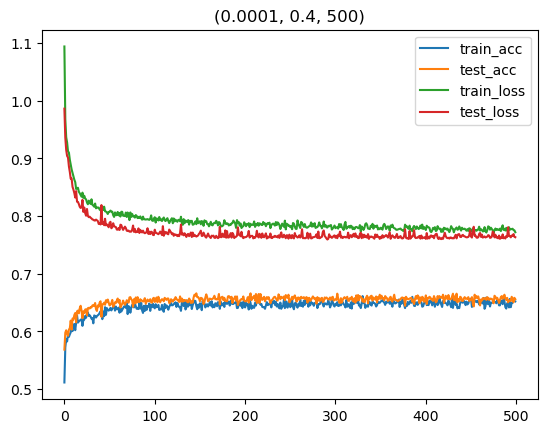

In [200]:
dropoutnn(x_train,x_test,y_train,y_test,0.0001,0.4,500,500)